## Feature Type Experiments

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-10-30 22:57:51.148400: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-30 22:57:53.375758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 22:57:56.202772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *
from sim import sim_run
from sim import plot

In [4]:
# overall imports
import importlib
import data

# data load
from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.base_models
from models.base_models import ModelBuild
importlib.reload(models.base_models)

# metric classes
import metrics.distance_FC
import metrics.eval
from metrics.eval import ModelEvaluator
from metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(metrics.eval)


# sim class
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
import sim.sim_run
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results
importlib.reload(sim.sim)
importlib.reload(sim.sim_utils)
importlib.reload(sim.sim_run)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

In [5]:

total = psutil.disk_usage('/').total
print(bytes2human(total))

GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.showUtilization()


52.4G
GPU found 0
XGBoost version: 2.0.3
cupy version: 13.1.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [6]:
torch.cuda.is_available()

True

In [7]:
print(torch.__file__)
print(torch.__version__)

# How many GPUs are there?
print(torch.cuda.device_count())


# Get the name of the current GPU
print(torch.cuda.get_device_name(torch.cuda.current_device()))

# Is PyTorch using a GPU?
print(torch.cuda.is_available())

/ext3/miniconda3/lib/python3.11/site-packages/torch/__init__.py
2.4.1+cu121
1
NVIDIA A100-SXM4-80GB
True


[Sims](#sims)

### Predict structural connectome from transcriptome

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(7140, 22106) (7140,) (812, 22106) (812,)
2
3
4
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.955, test=0.154) total time=   3.8s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.952, test=0.228) total time=   1.7s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.952, test=0.184) total time=   1.7s
[CV 1/3] END co

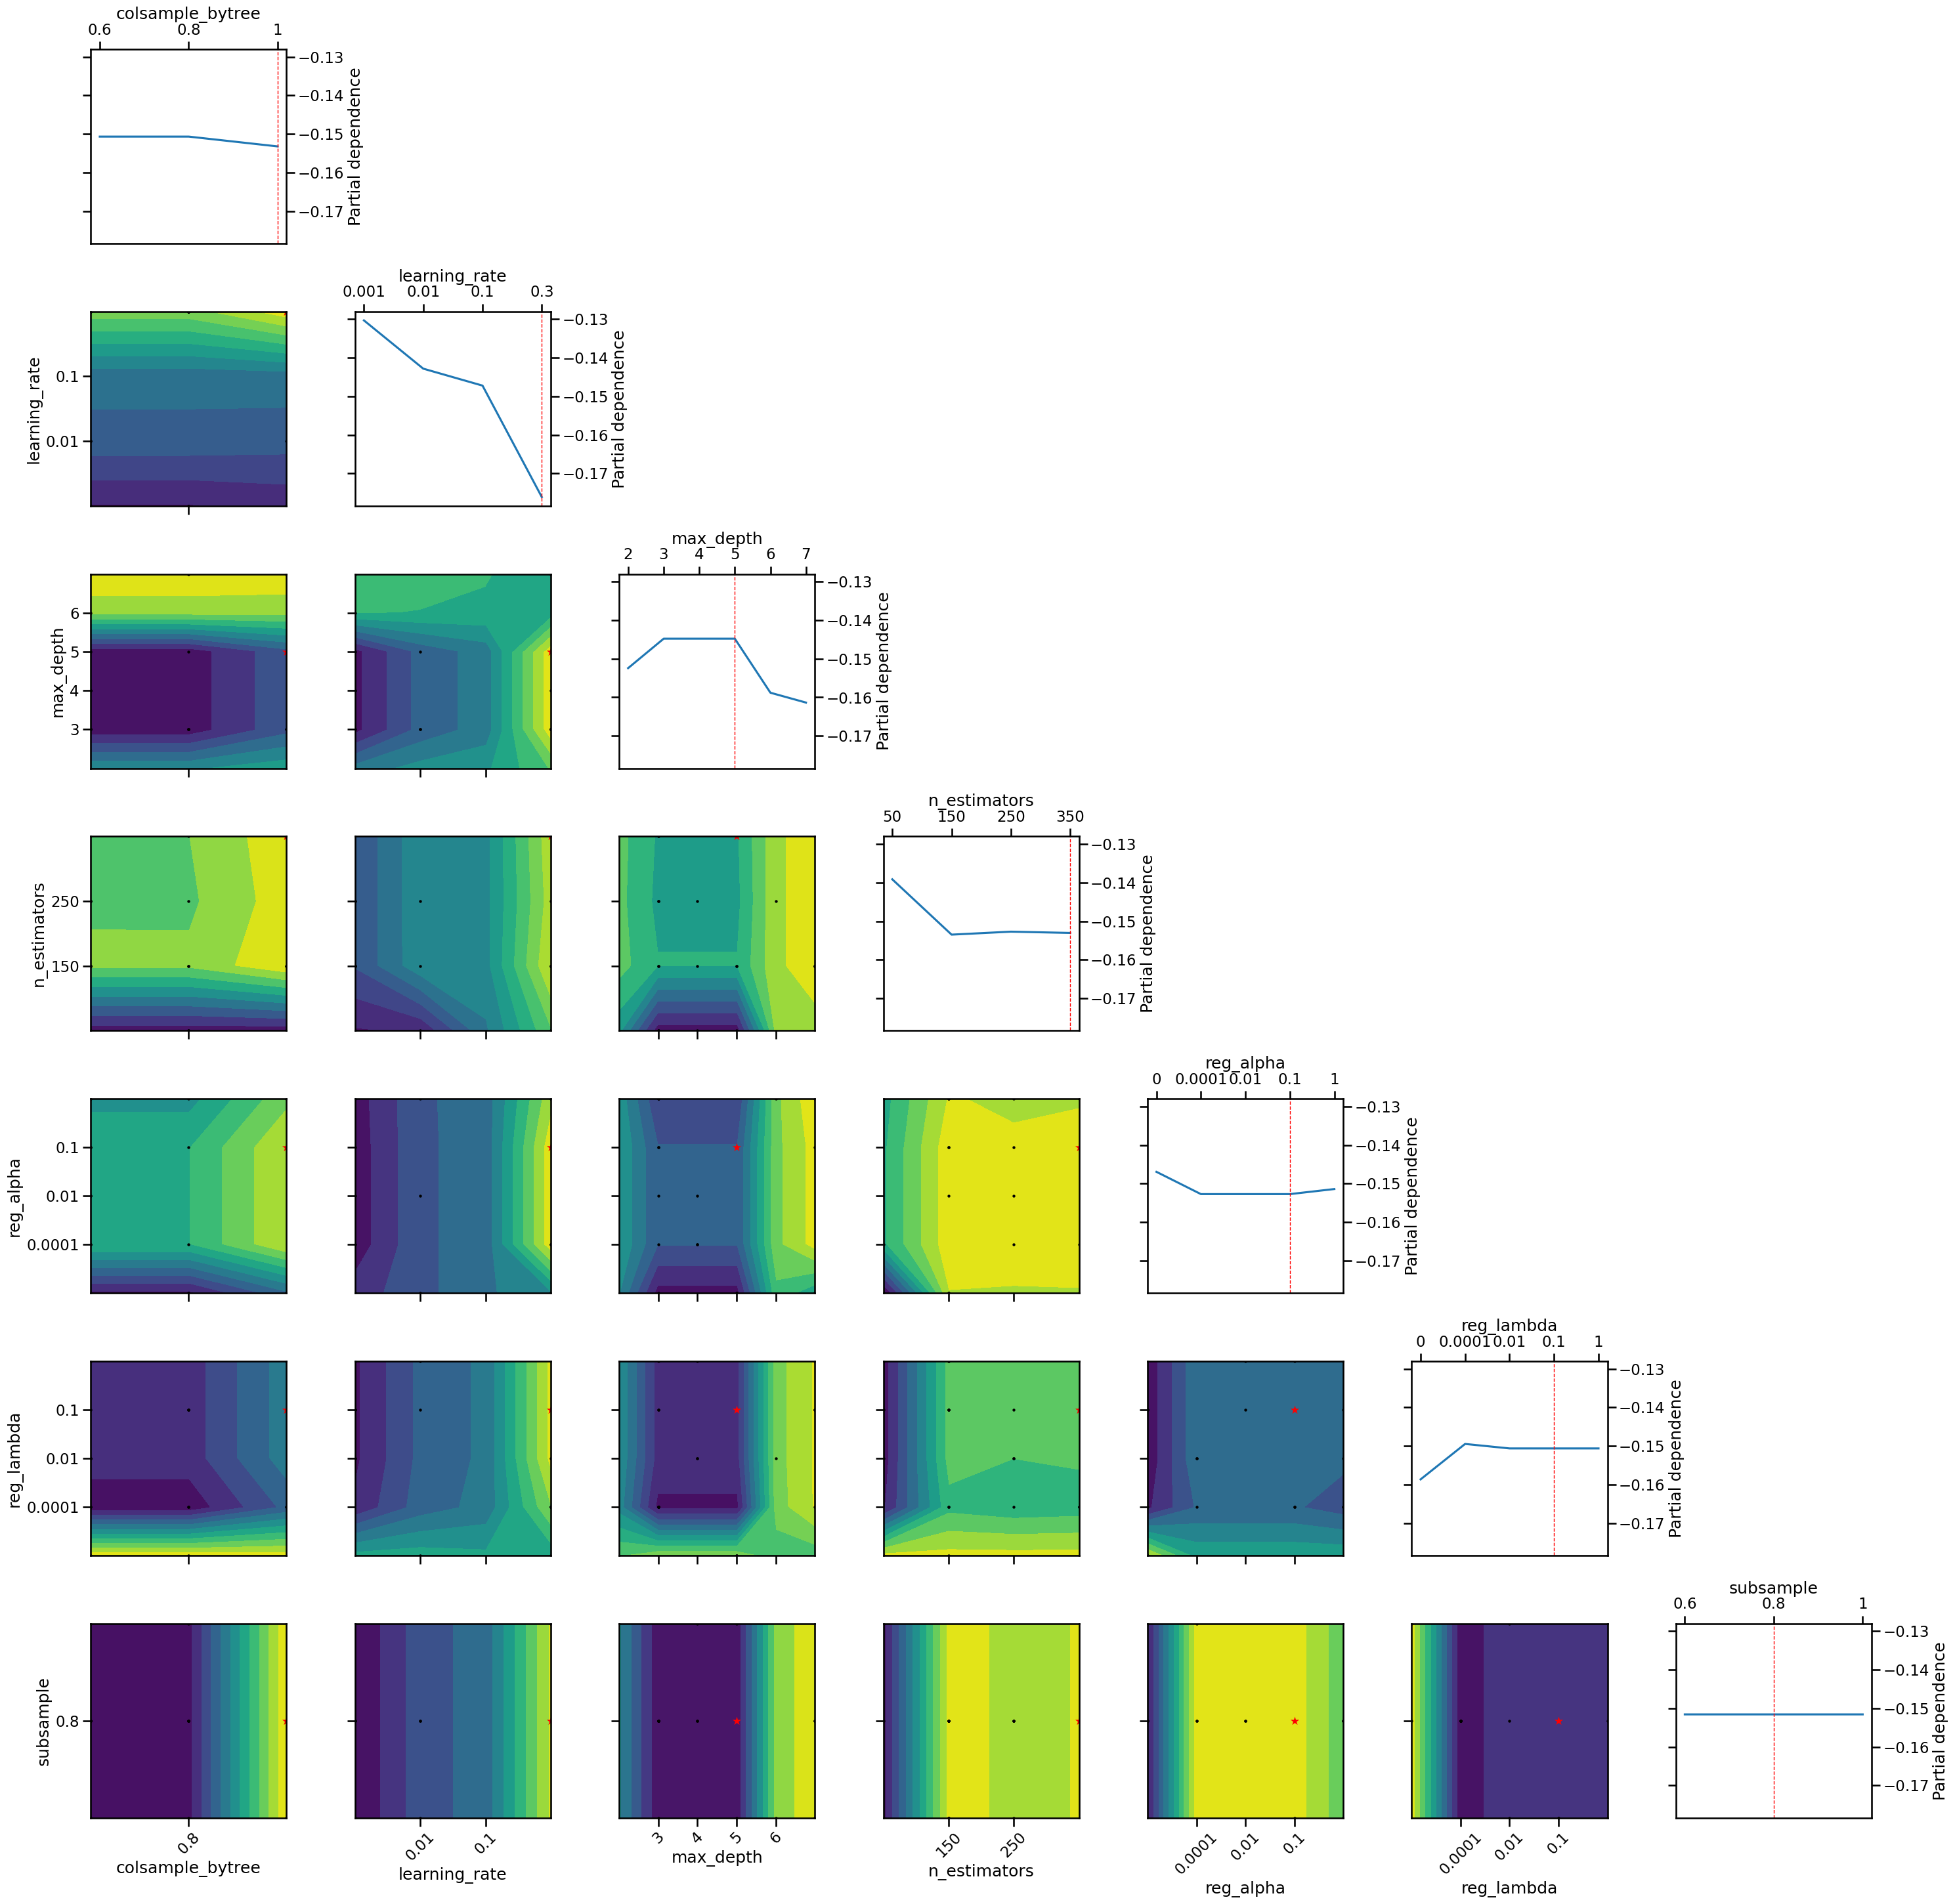


Train Metrics: {'mse': 0.028089989860634854, 'mae': 0.1266809154866862, 'r2': 0.9969978166801023, 'pearson_corr': 0.9988533224029579, 'connectome_corr': 0.9987897897045, 'connectome_r2': 0.996986550623071, 'geodesic_distance': 3.508698405981666}
Test Metrics: {'mse': 9.523839870674351, 'mae': 2.5165307413662514, 'r2': -0.2835417061188337, 'pearson_corr': 0.3011781374434906, 'connectome_corr': 0.26238328405640765, 'connectome_r2': -0.29565386370717306, 'geodesic_distance': 7.787004132803705}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta

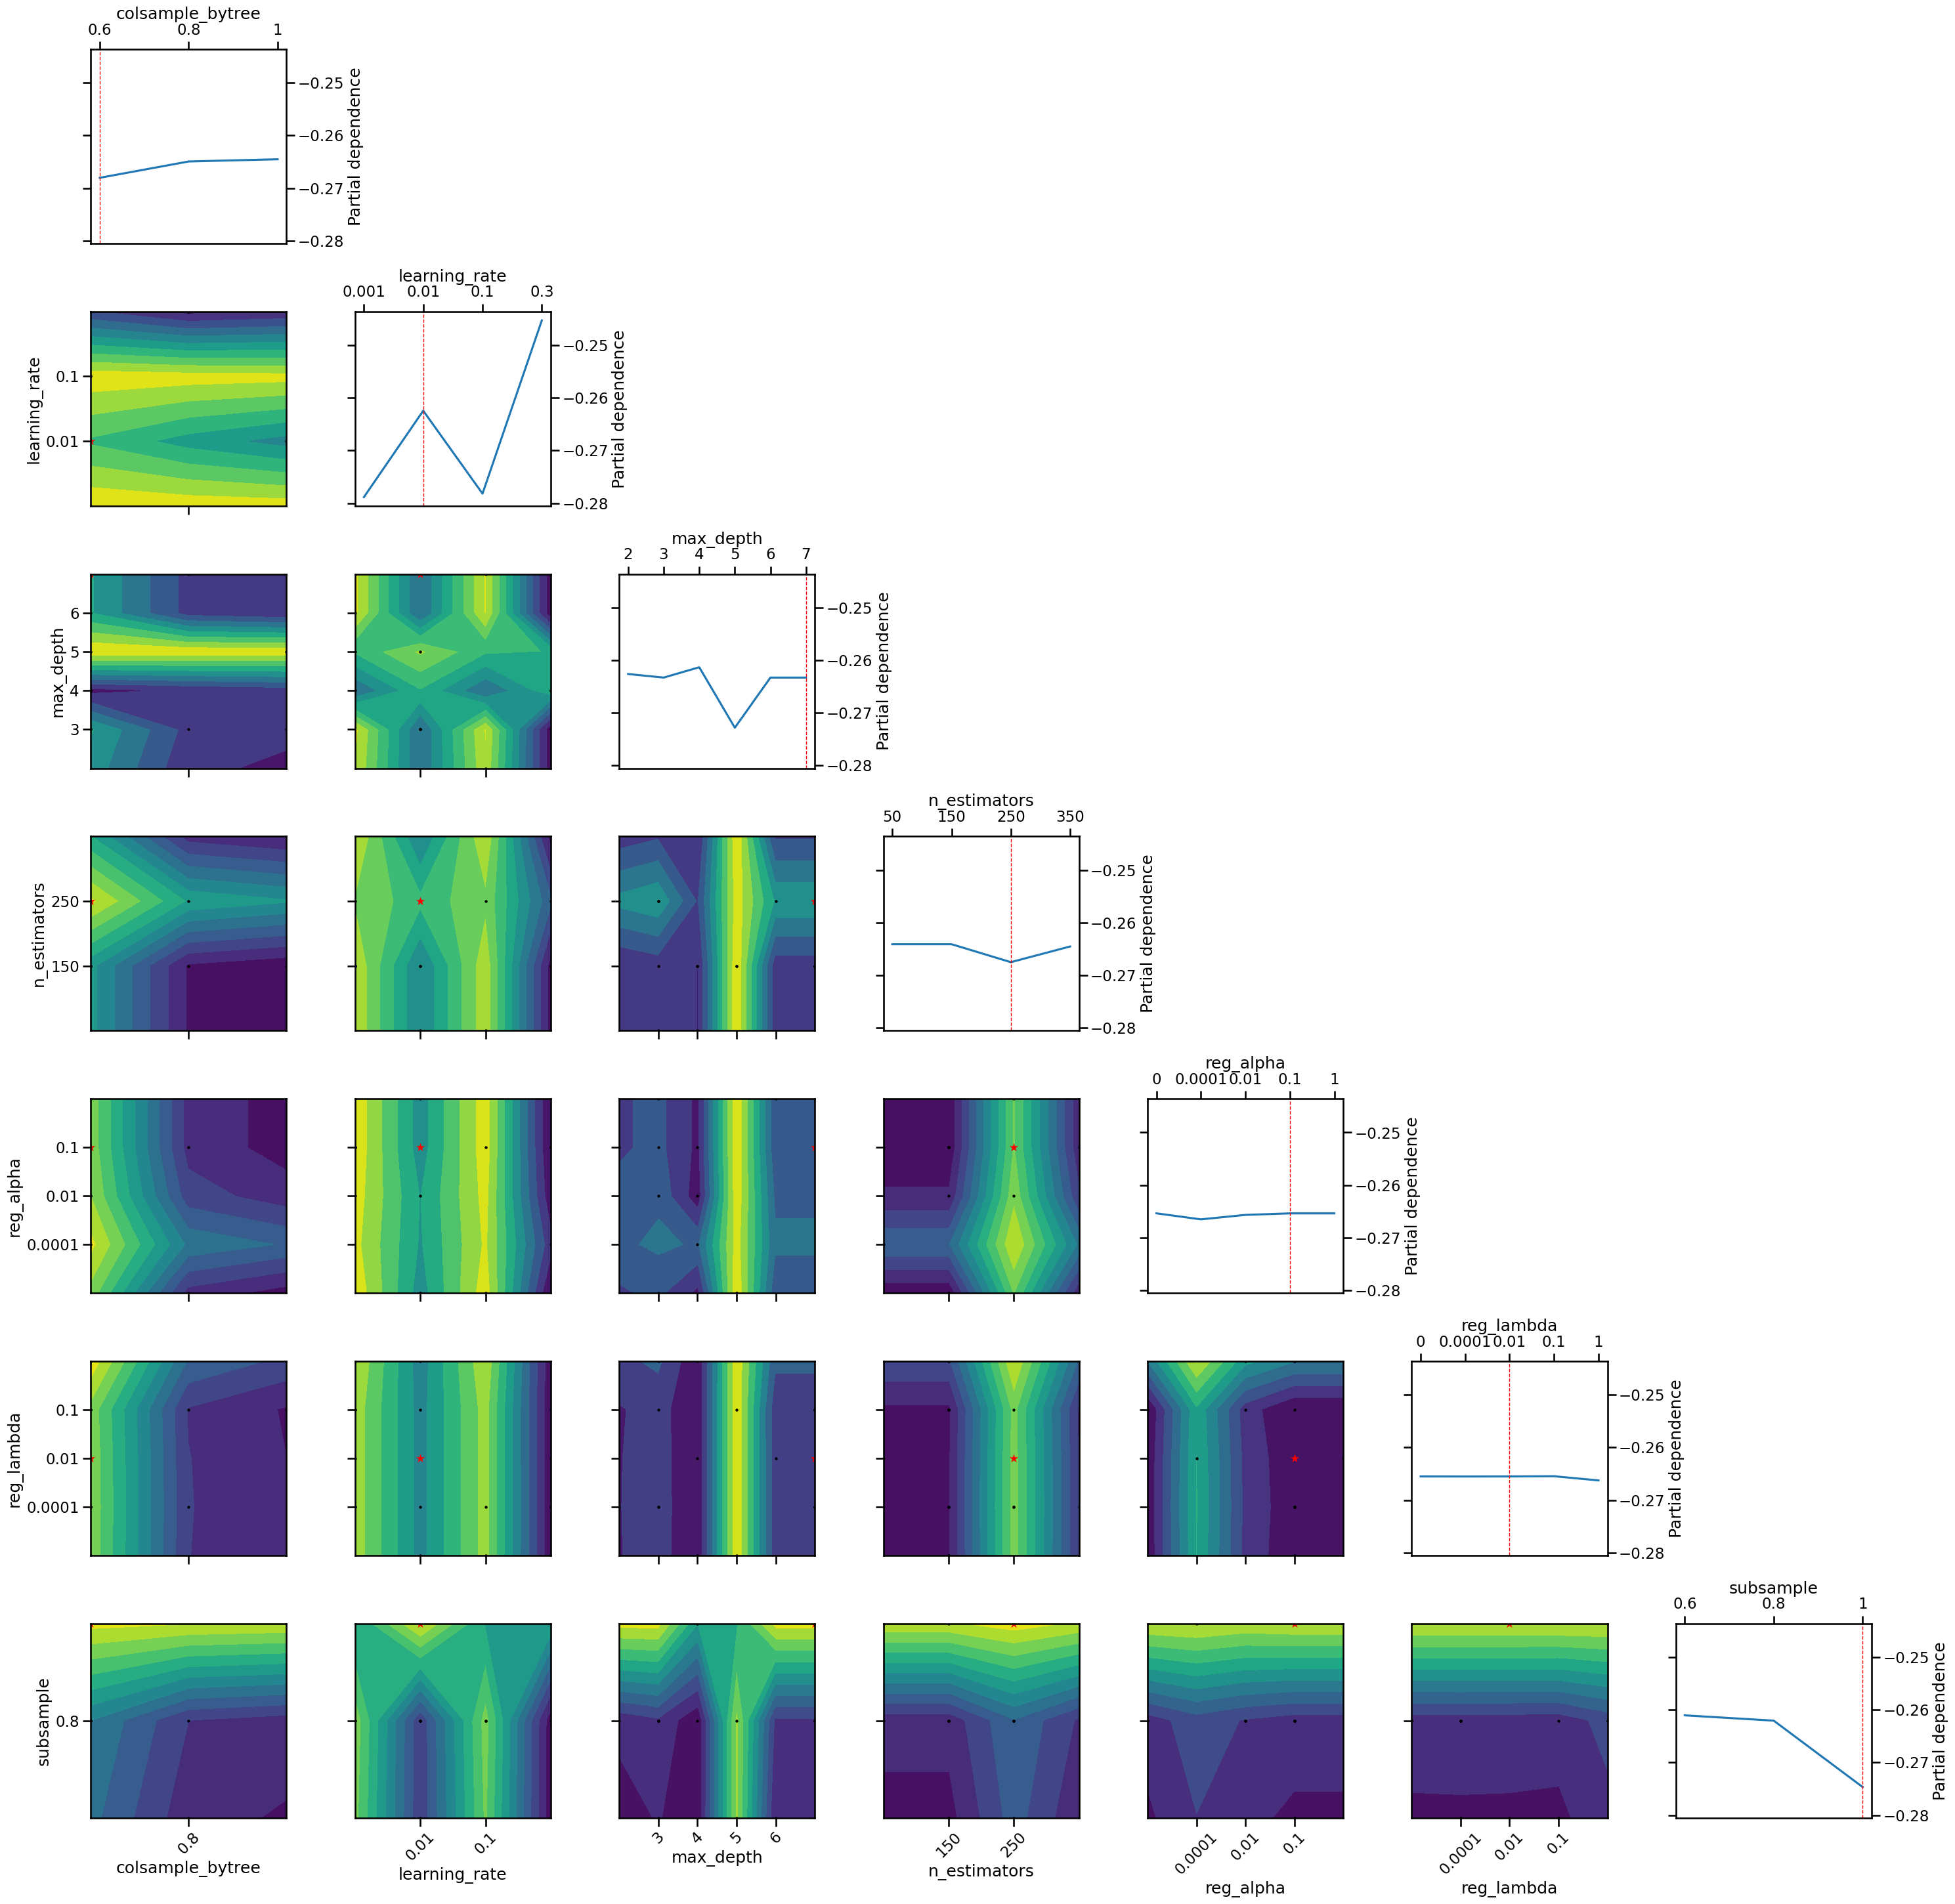


Train Metrics: {'mse': 4.558003288431159, 'mae': 1.6184794763096608, 'r2': 0.5099308248696209, 'pearson_corr': 0.8117672357635655, 'connectome_corr': 0.8170972249045443, 'connectome_r2': 0.5081110087694385, 'geodesic_distance': 14.055823014088219}
Test Metrics: {'mse': 7.746152209993063, 'mae': 2.2294672638741853, 'r2': -0.041277518917671646, 'pearson_corr': 0.2905417146090631, 'connectome_corr': 0.2714191143484738, 'connectome_r2': -0.05015527639467889, 'geodesic_distance': 8.984912018157768}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max

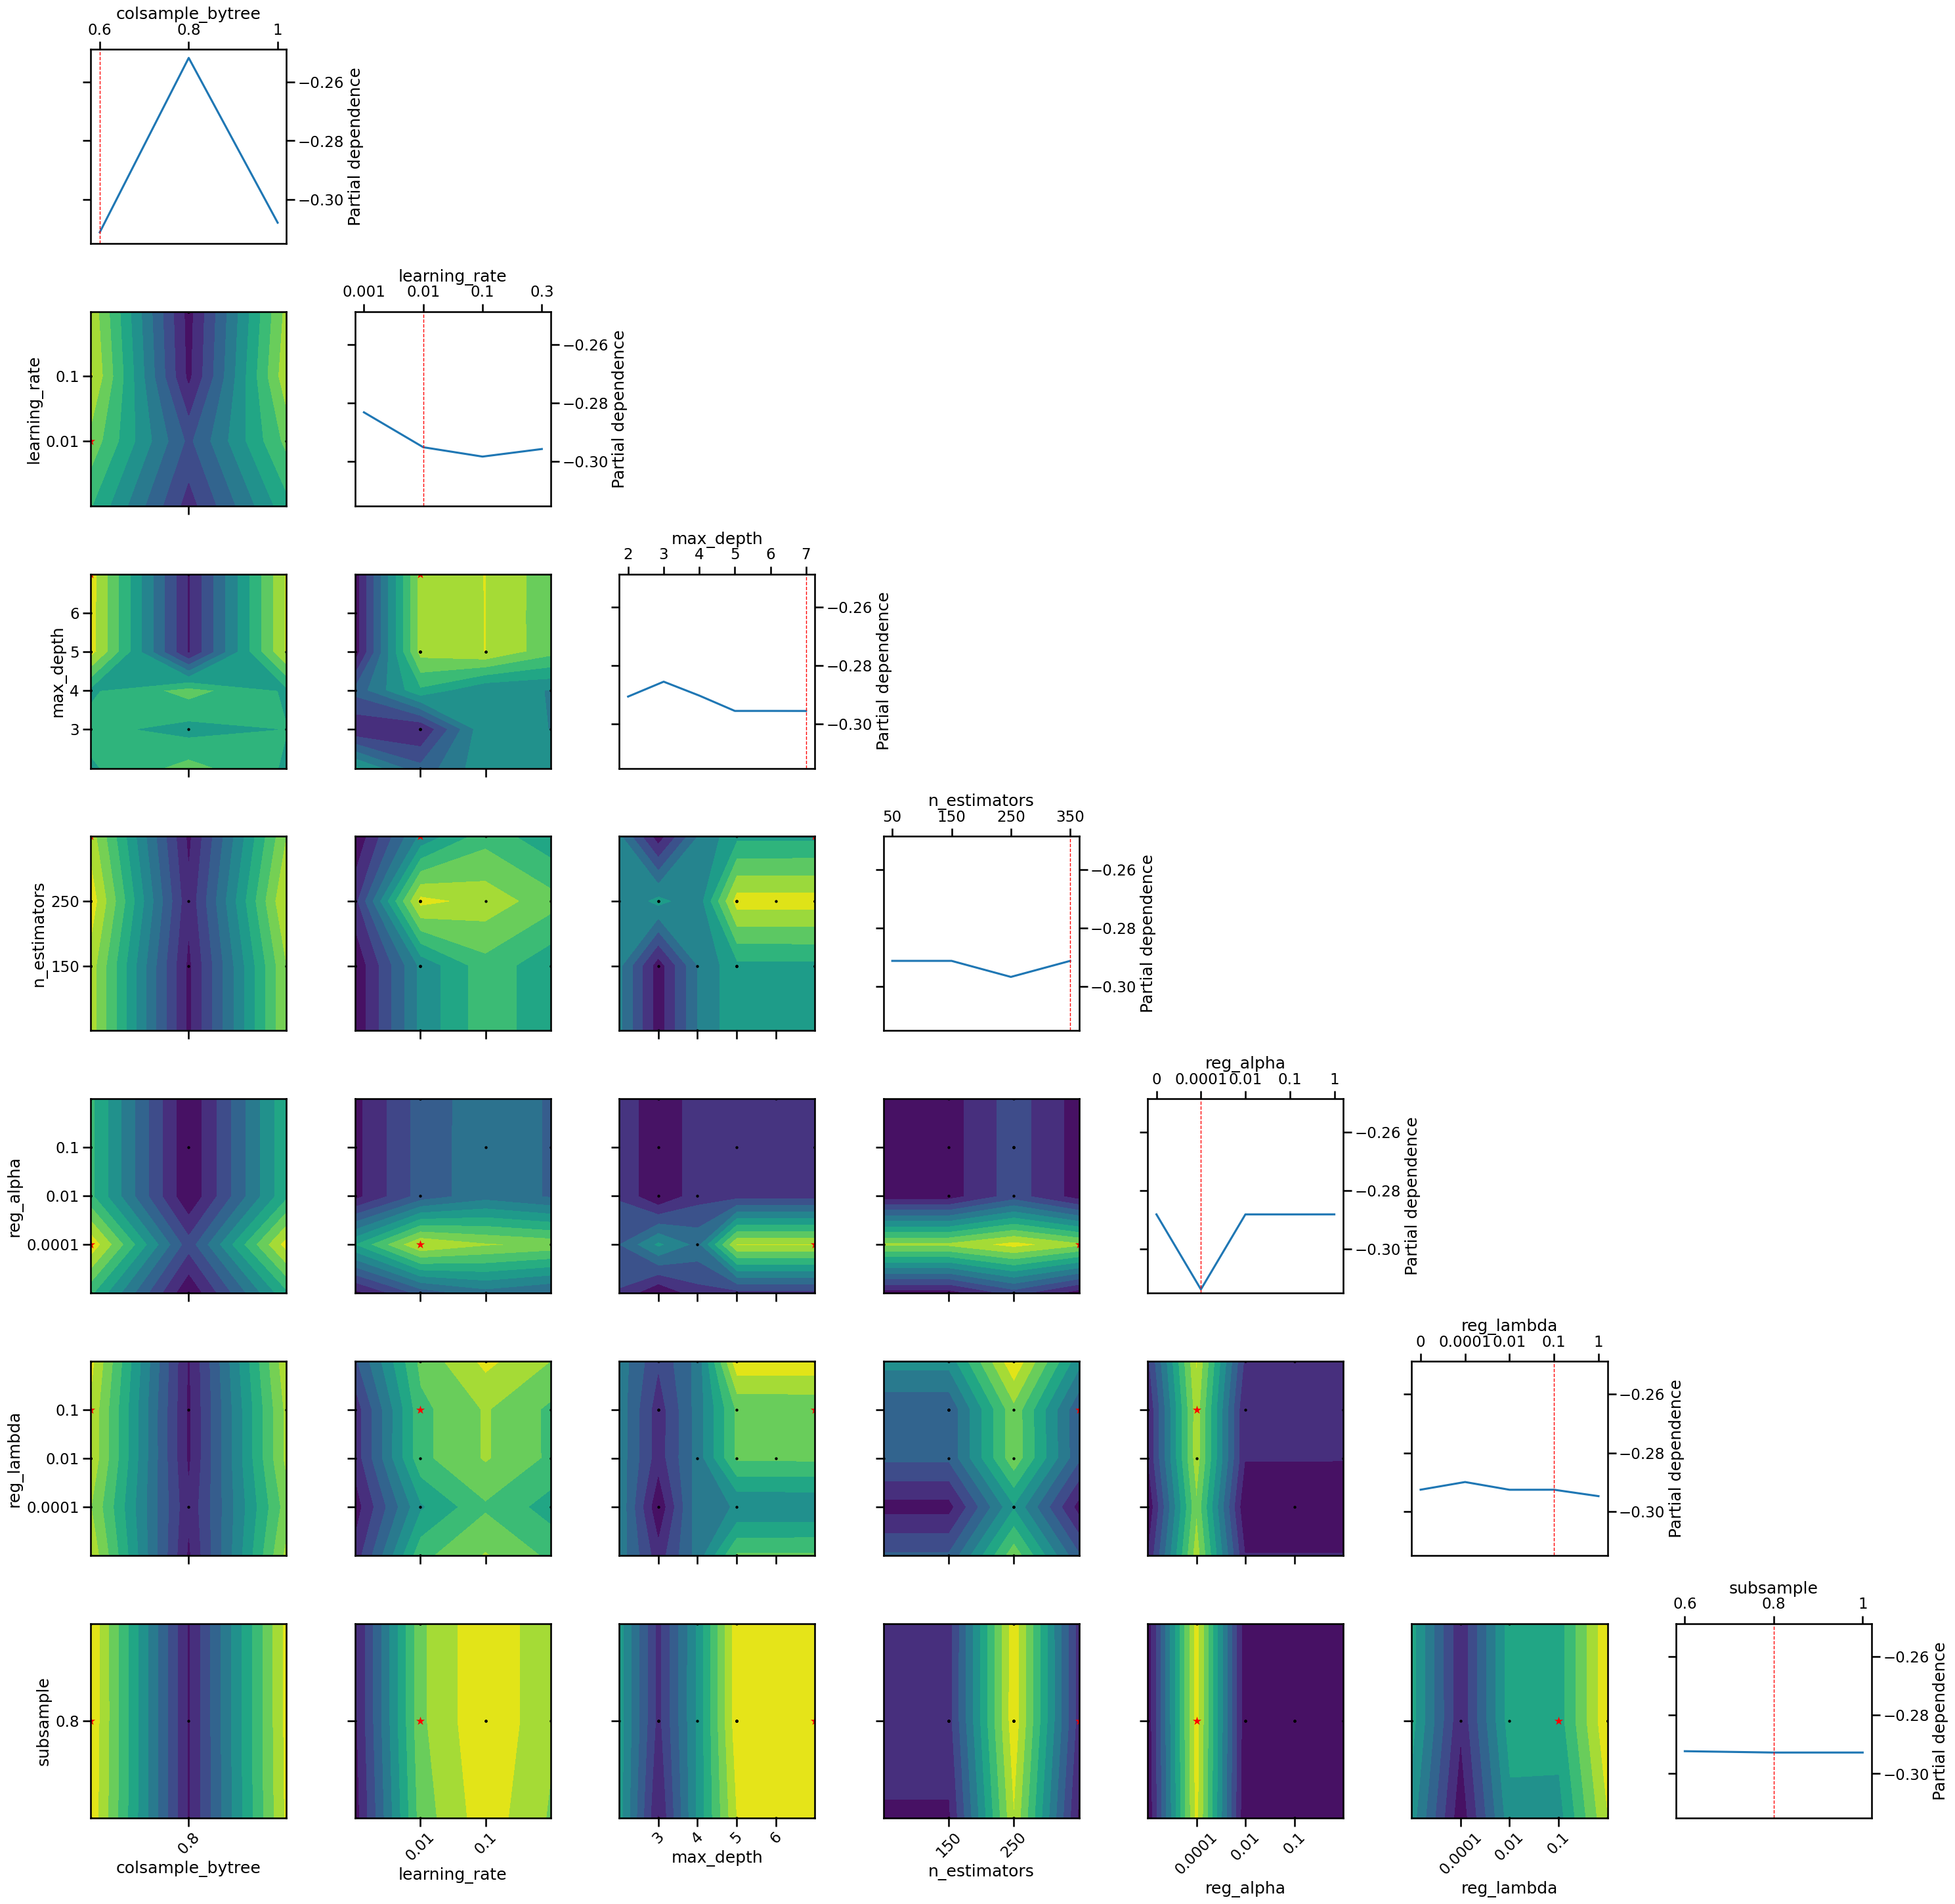


Train Metrics: {'mse': 3.0324920244724614, 'mae': 1.2981315311074502, 'r2': 0.6661415634134205, 'pearson_corr': 0.8961286664581869, 'connectome_corr': 0.910652156103459, 'connectome_r2': 0.6649467142797991, 'geodesic_distance': 12.148543393599262}
Test Metrics: {'mse': 8.413233742250446, 'mae': 2.3003116082967545, 'r2': 0.033563558858332294, 'pearson_corr': 0.3723682653589796, 'connectome_corr': 0.33607151358748577, 'connectome_r2': 0.023843685373954565, 'geodesic_distance': 9.434082251241652}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max

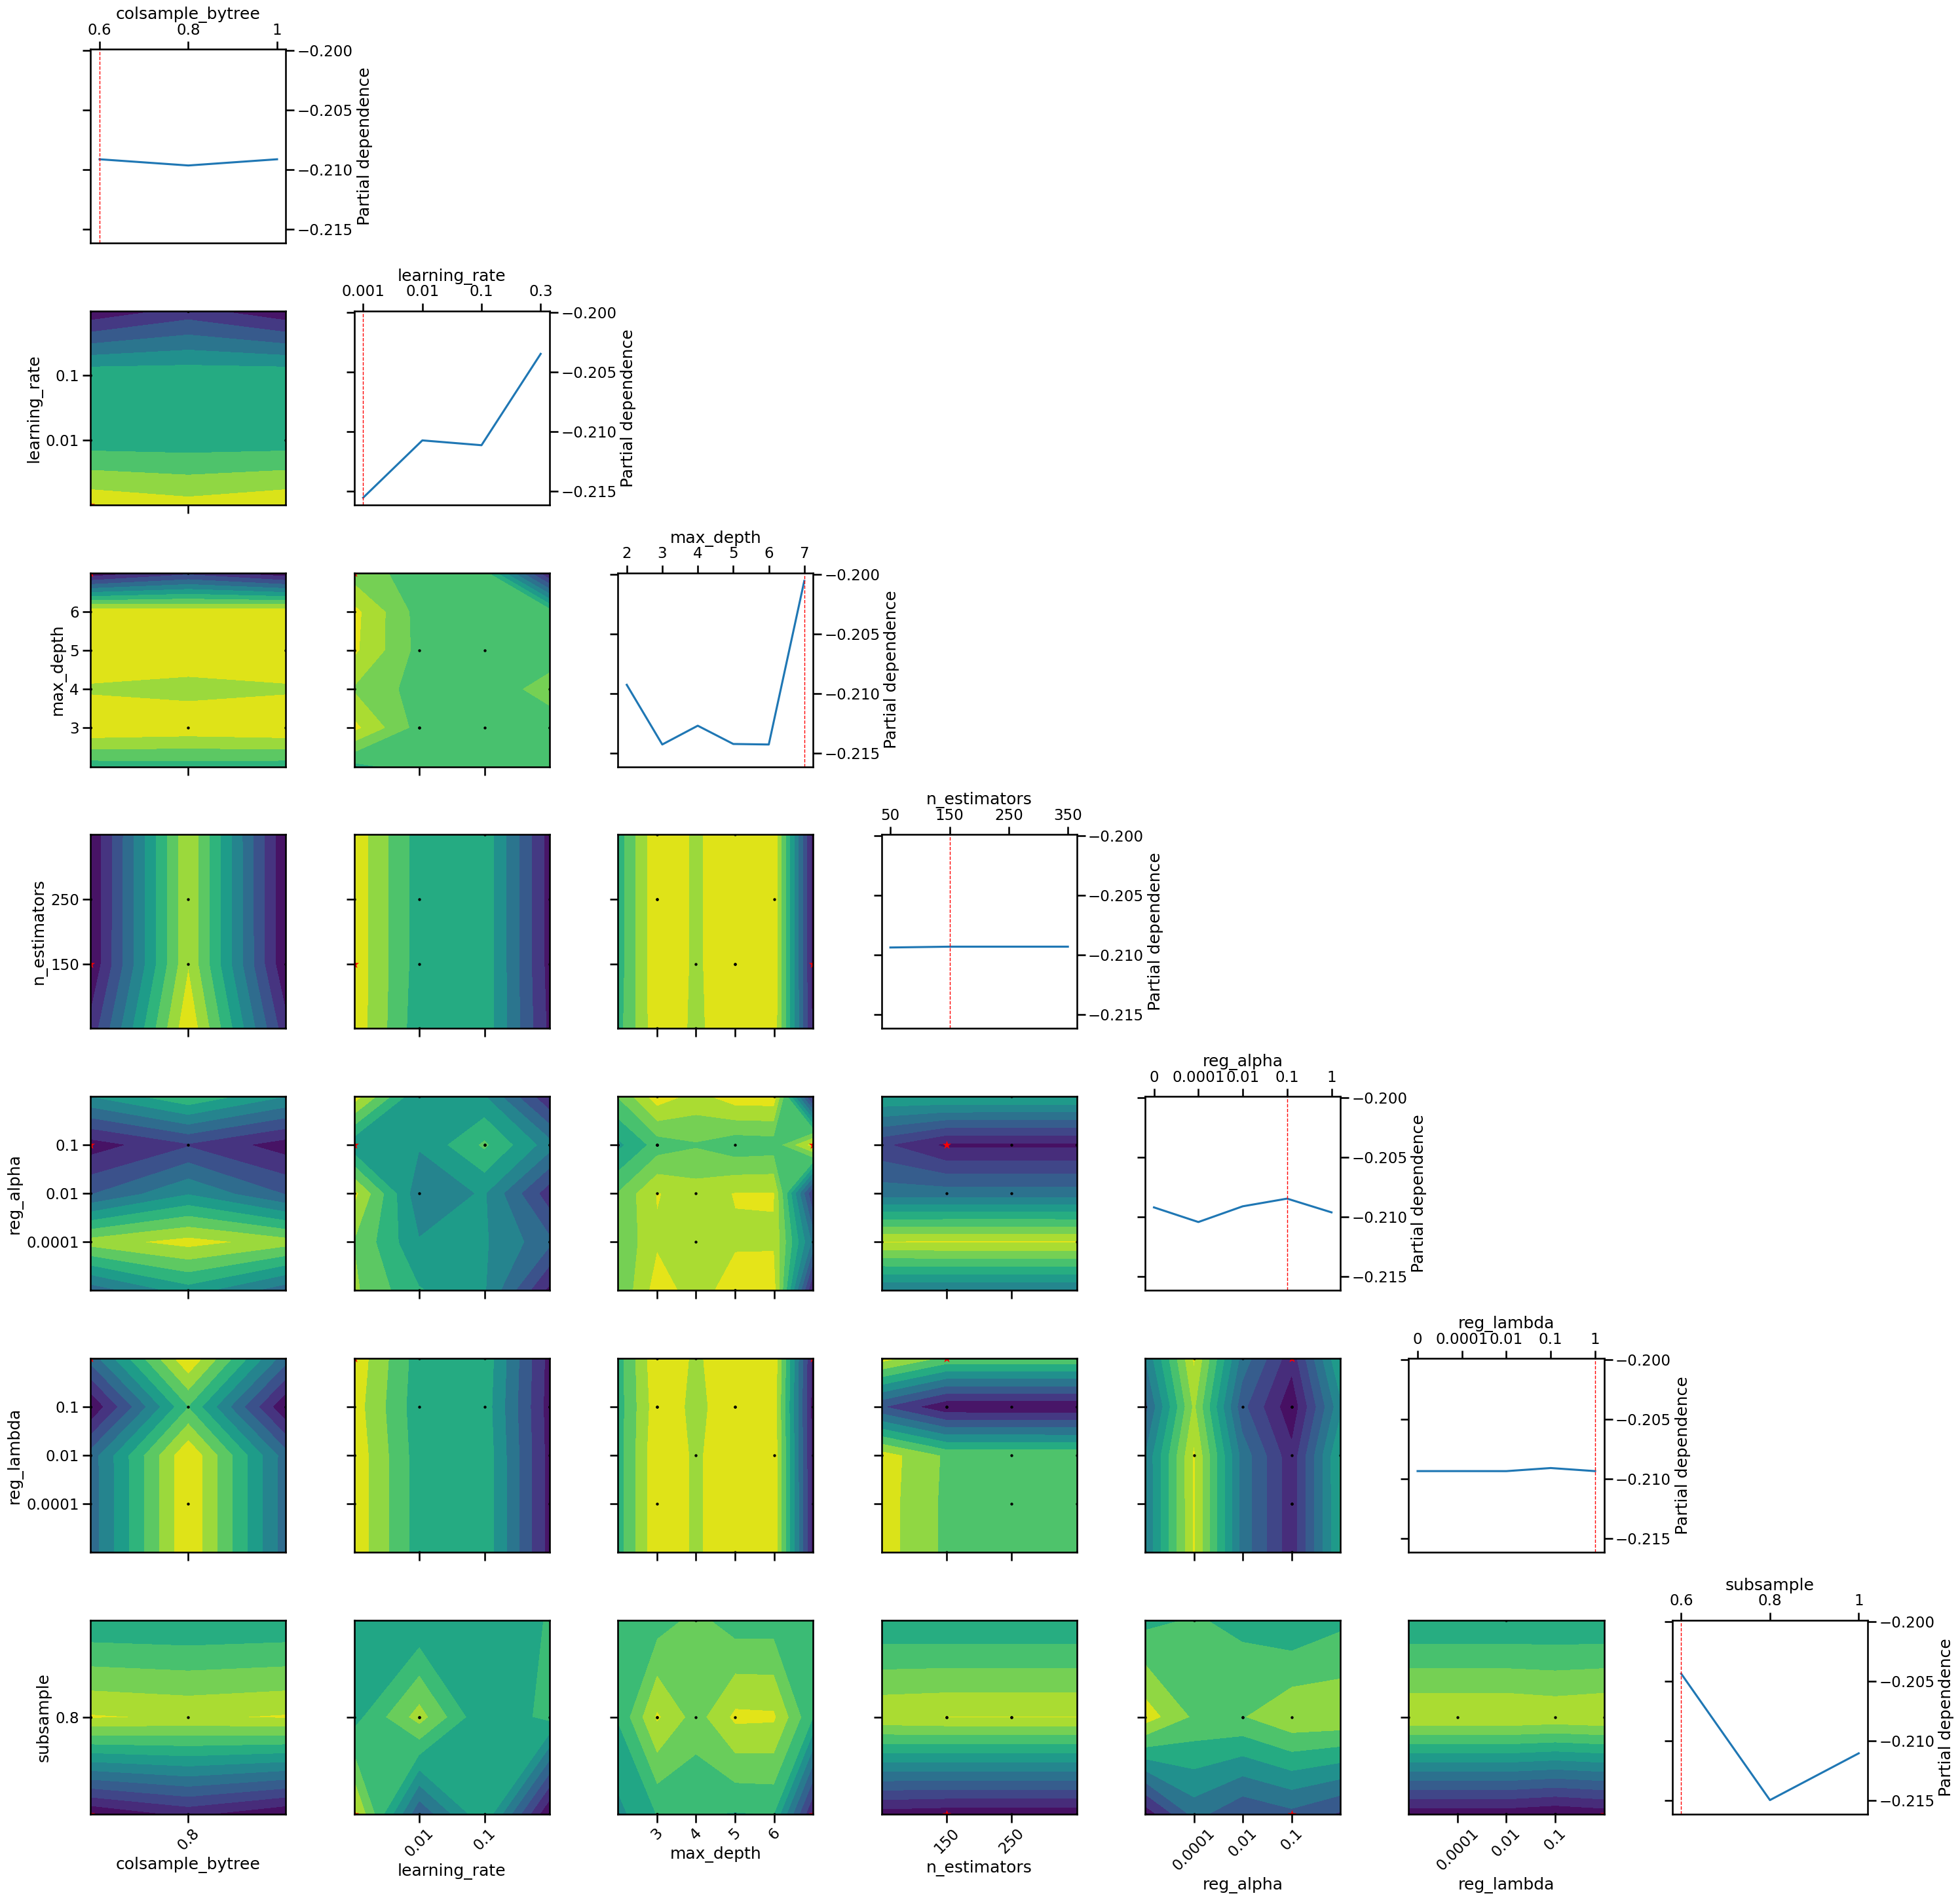


Train Metrics: {'mse': 8.89592243867907, 'mae': 2.401381061491587, 'r2': 0.03161368974396073, 'pearson_corr': 0.5099947285059167, 'connectome_corr': 0.7606038164782211, 'connectome_r2': 0.028184208099297274, 'geodesic_distance': 22.025353002162838}
Test Metrics: {'mse': 11.51338815250072, 'mae': 2.6756632707471755, 'r2': -0.0867129005616849, 'pearson_corr': 0.23999326162052853, 'connectome_corr': 0.34808377041185473, 'connectome_r2': -0.10750309994345406, 'geodesic_distance': 10.724091414961967}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.001, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, '

In [8]:
trans_to_struct_xgboost_sim_results = single_sim_run(
                                cv_type='random',
                                model_type='xgboost',
                                feature_type=['transcriptome'],
                                connectome_target='SC',
                                use_gpu=True,
                                use_shared_regions=False,
                                test_shared_regions=False,
                                save_sim=True,
                                resolution=1.01,
                                random_seed=42,
                                search_method=('bayes', 'pearson')
                                )

In [12]:
trans_to_struct_xgboost_sim_results = single_sim_run(
                                cv_type='community',
                                model_type='xgboost',
                                feature_type=['transcriptome'],
                                connectome_target='SC',
                                use_gpu=True,
                                use_shared_regions=False,
                                test_shared_regions=False,
                                save_sim=True,
                                resolution=1.01,
                                random_seed=42,
                                search_method=('bayes', 'pearson')
                                )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(6320, 22106) (6320,) (1122, 22106) (1122,)
2
3
ACCELERATING
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.981, test=0.180) total time=   1.3s
[CV 2/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.992, test=0.203) total time=   1.0s
[CV 1/2] END colsample_bytree=0.6, device=cuda, learning_rate=0.001, max_depth=6, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=1, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=(train=0.784, test=0.289) total time=   3.1s
[CV 2/2] END cols

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(7140, 22106) (7140,) (812, 22106) (812,)
2
3
4
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.987, test=0.537) total time=   1.7s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.989, test=0.346) total time=   1.7s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.985, test=0.526) total time=   1.7s
[CV 1/3] END co

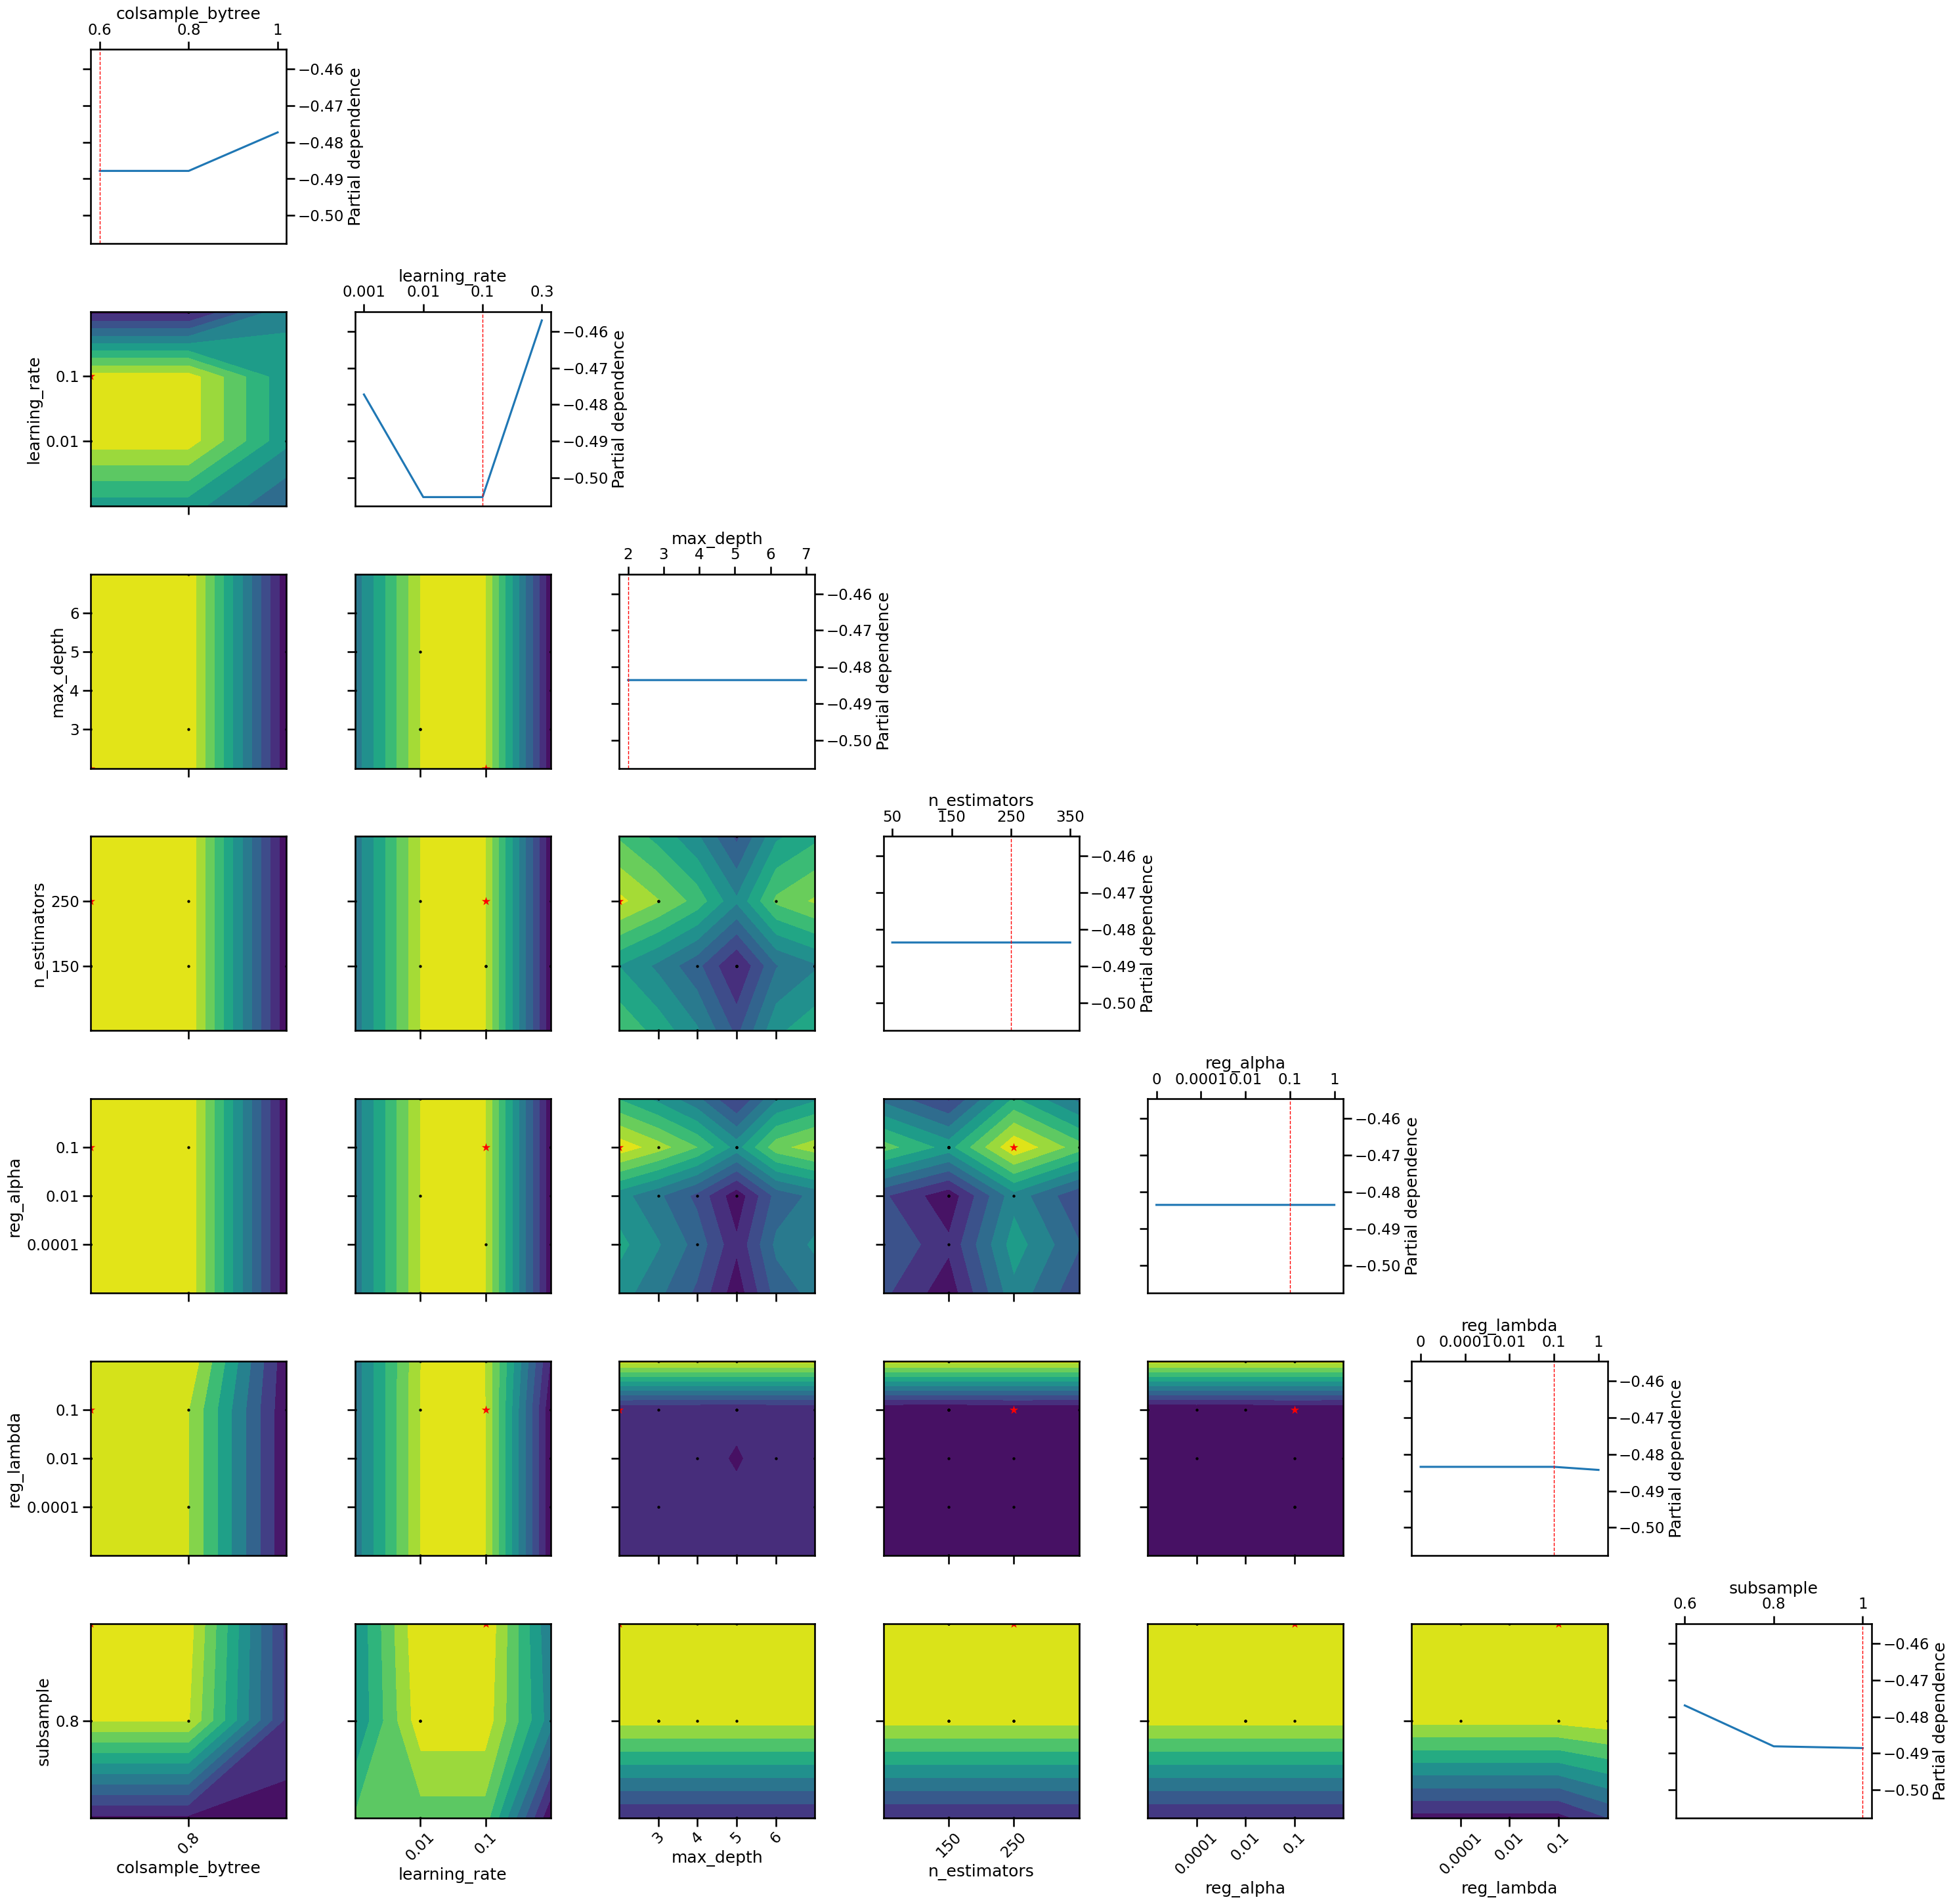


Train Metrics: {'mse': 0.012586948875405377, 'mae': 0.07590896170415226, 'r2': 0.42473201547830264, 'pearson_corr': 0.8069546698750409, 'connectome_corr': 0.6505061844902682, 'connectome_r2': 0.39993372168177926, 'geodesic_distance': 11.278461291436779}
Test Metrics: {'mse': 0.019430902668462445, 'mae': 0.10231164958046836, 'r2': -0.667920870748159, 'pearson_corr': 0.595315070477201, 'connectome_corr': 0.44382189040522824, 'connectome_r2': -0.8779200860623712, 'geodesic_distance': 6.025496457368482}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None,

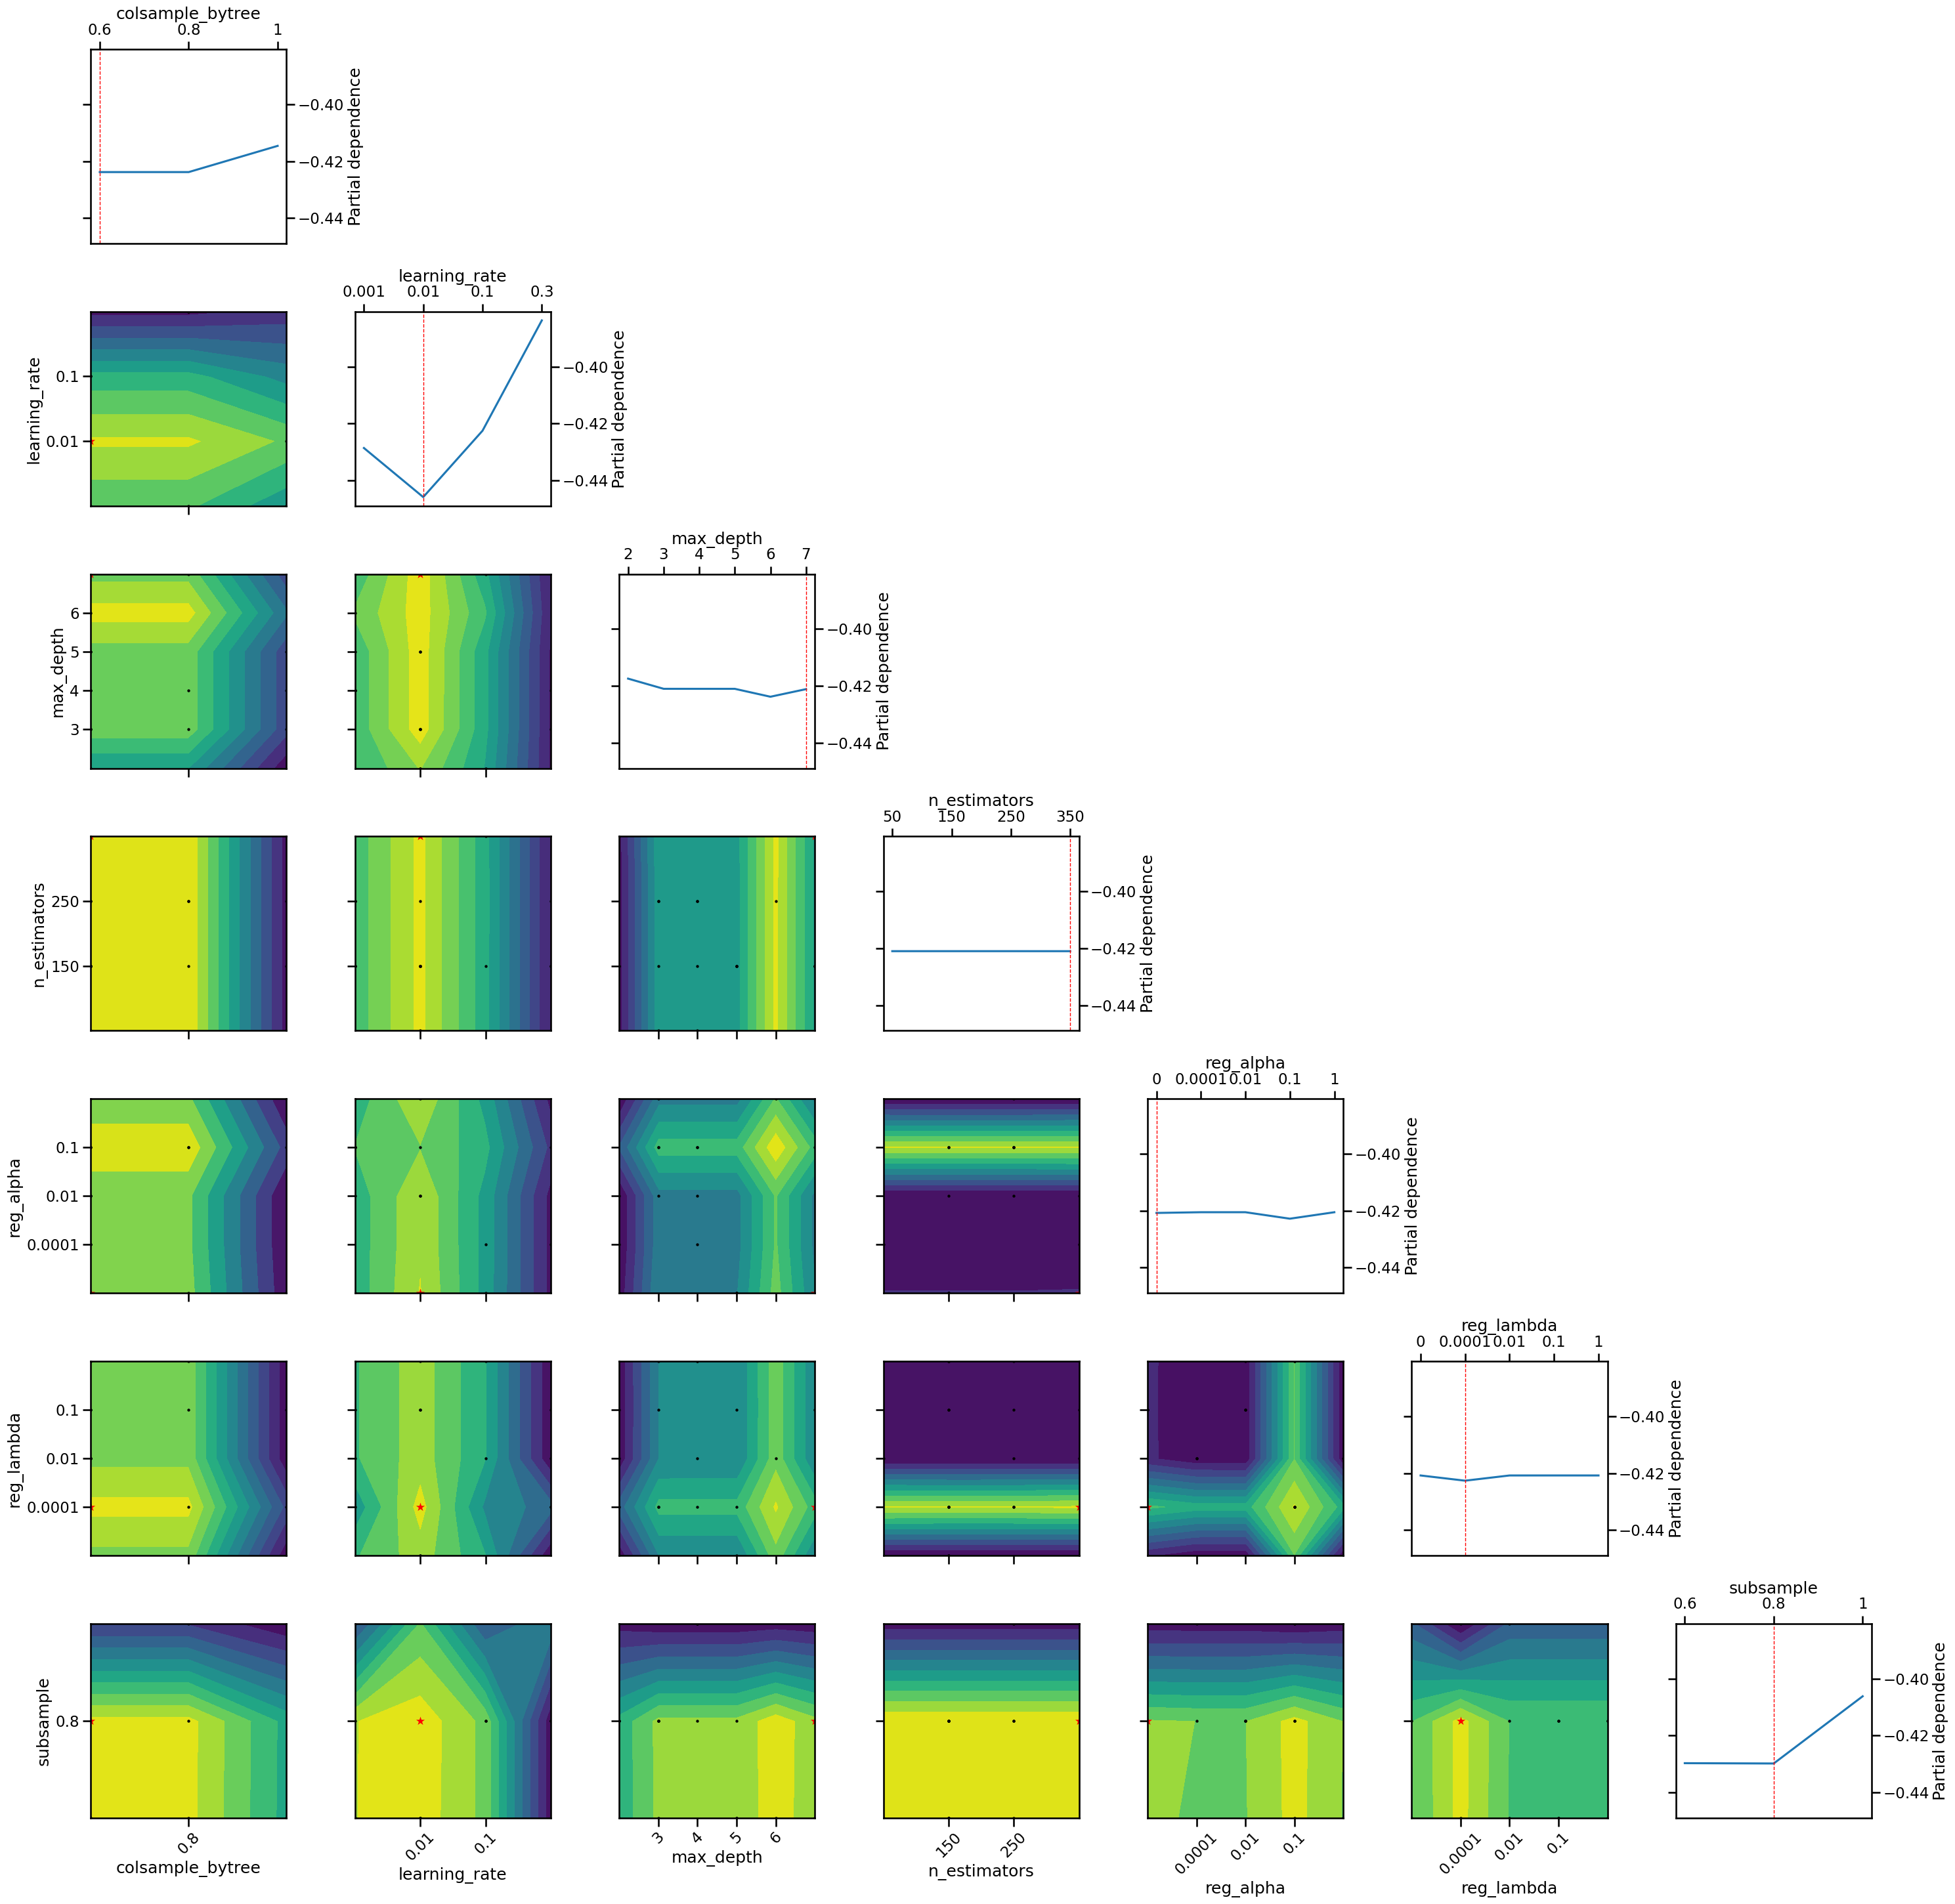


Train Metrics: {'mse': 0.0032935192831293745, 'mae': 0.03761993582392631, 'r2': 0.852777703518796, 'pearson_corr': 0.9576296673245082, 'connectome_corr': 0.9499713125992185, 'connectome_r2': 0.846440660035282, 'geodesic_distance': 7.260914474444581}
Test Metrics: {'mse': 0.020189982345716315, 'mae': 0.10576738258779052, 'r2': -2.4178625406049337, 'pearson_corr': 0.6998656025481259, 'connectome_corr': 0.575660157405162, 'connectome_r2': -2.876536697525884, 'geodesic_distance': 5.228200001550278}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'ma

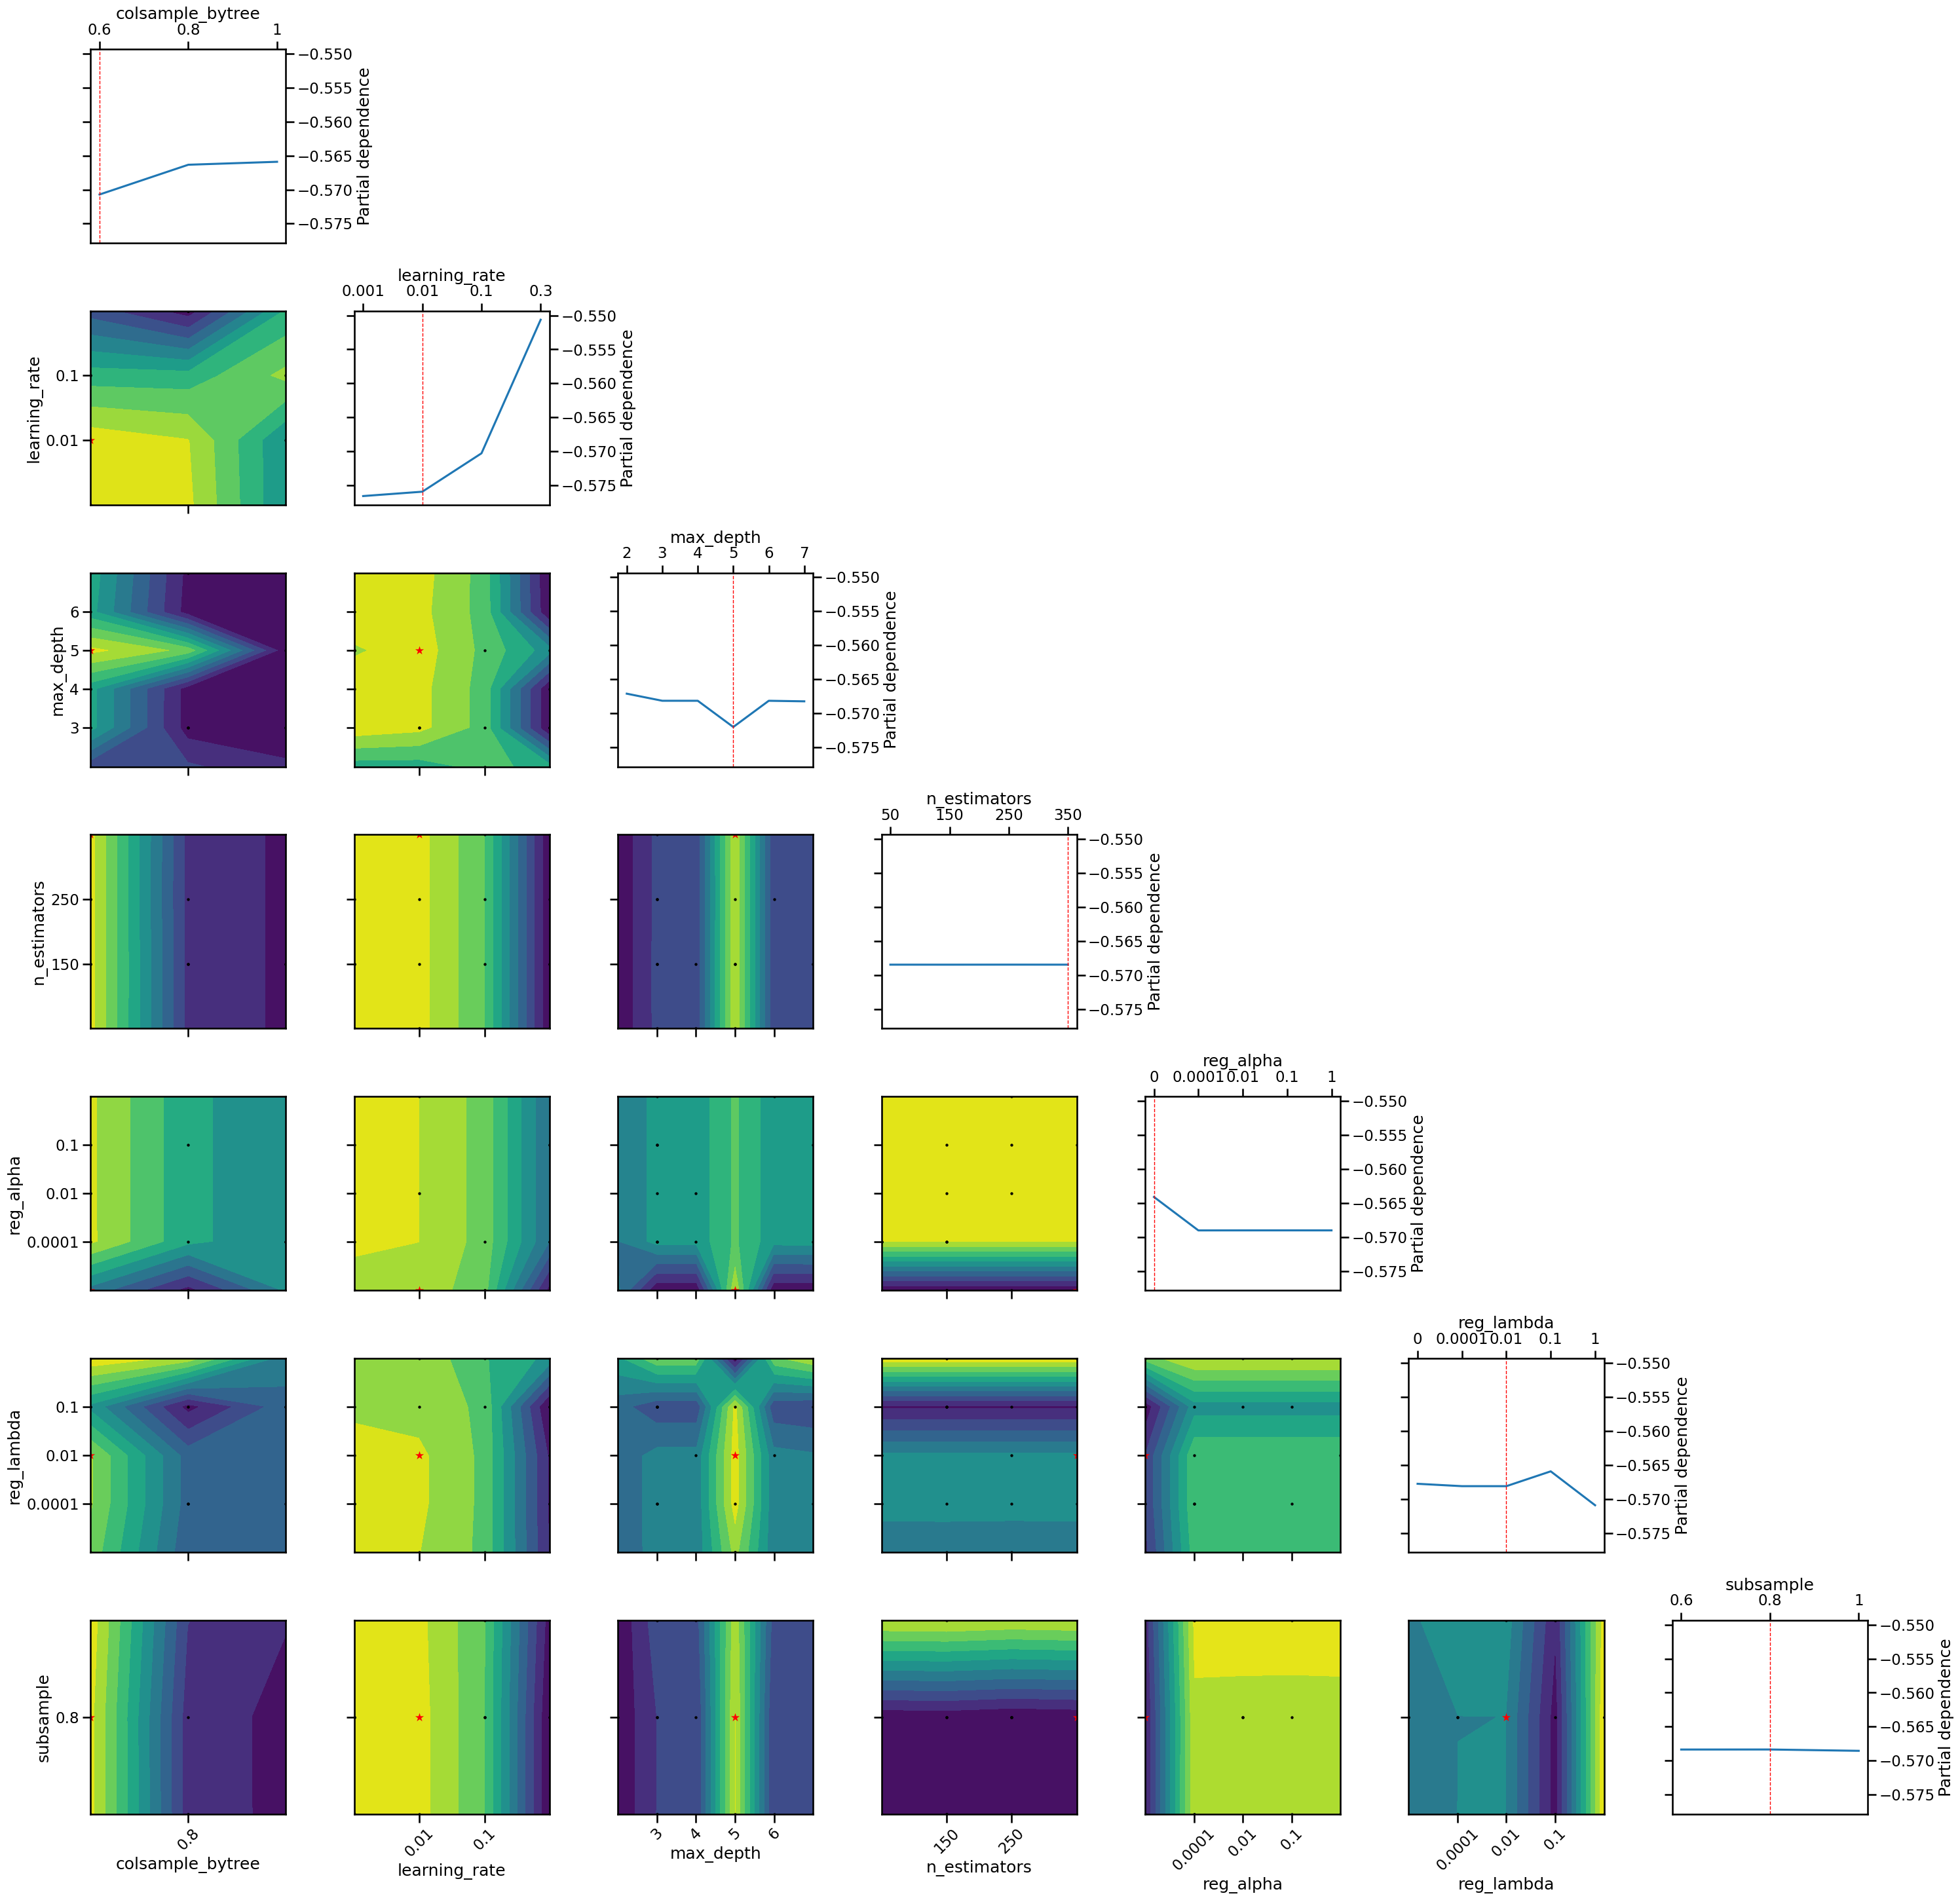


Train Metrics: {'mse': 0.00657958751225738, 'mae': 0.053689104296261364, 'r2': 0.6885286940511953, 'pearson_corr': 0.9050988394161266, 'connectome_corr': 0.8687647238742412, 'connectome_r2': 0.6762808855489088, 'geodesic_distance': 9.734227697584648}
Test Metrics: {'mse': 0.024613114142262398, 'mae': 0.1164389557252317, 'r2': 0.040780852103873465, 'pearson_corr': 0.46916886124809776, 'connectome_corr': 0.27024324719960974, 'connectome_r2': -0.1736713115137282, 'geodesic_distance': 5.788357786751365}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None

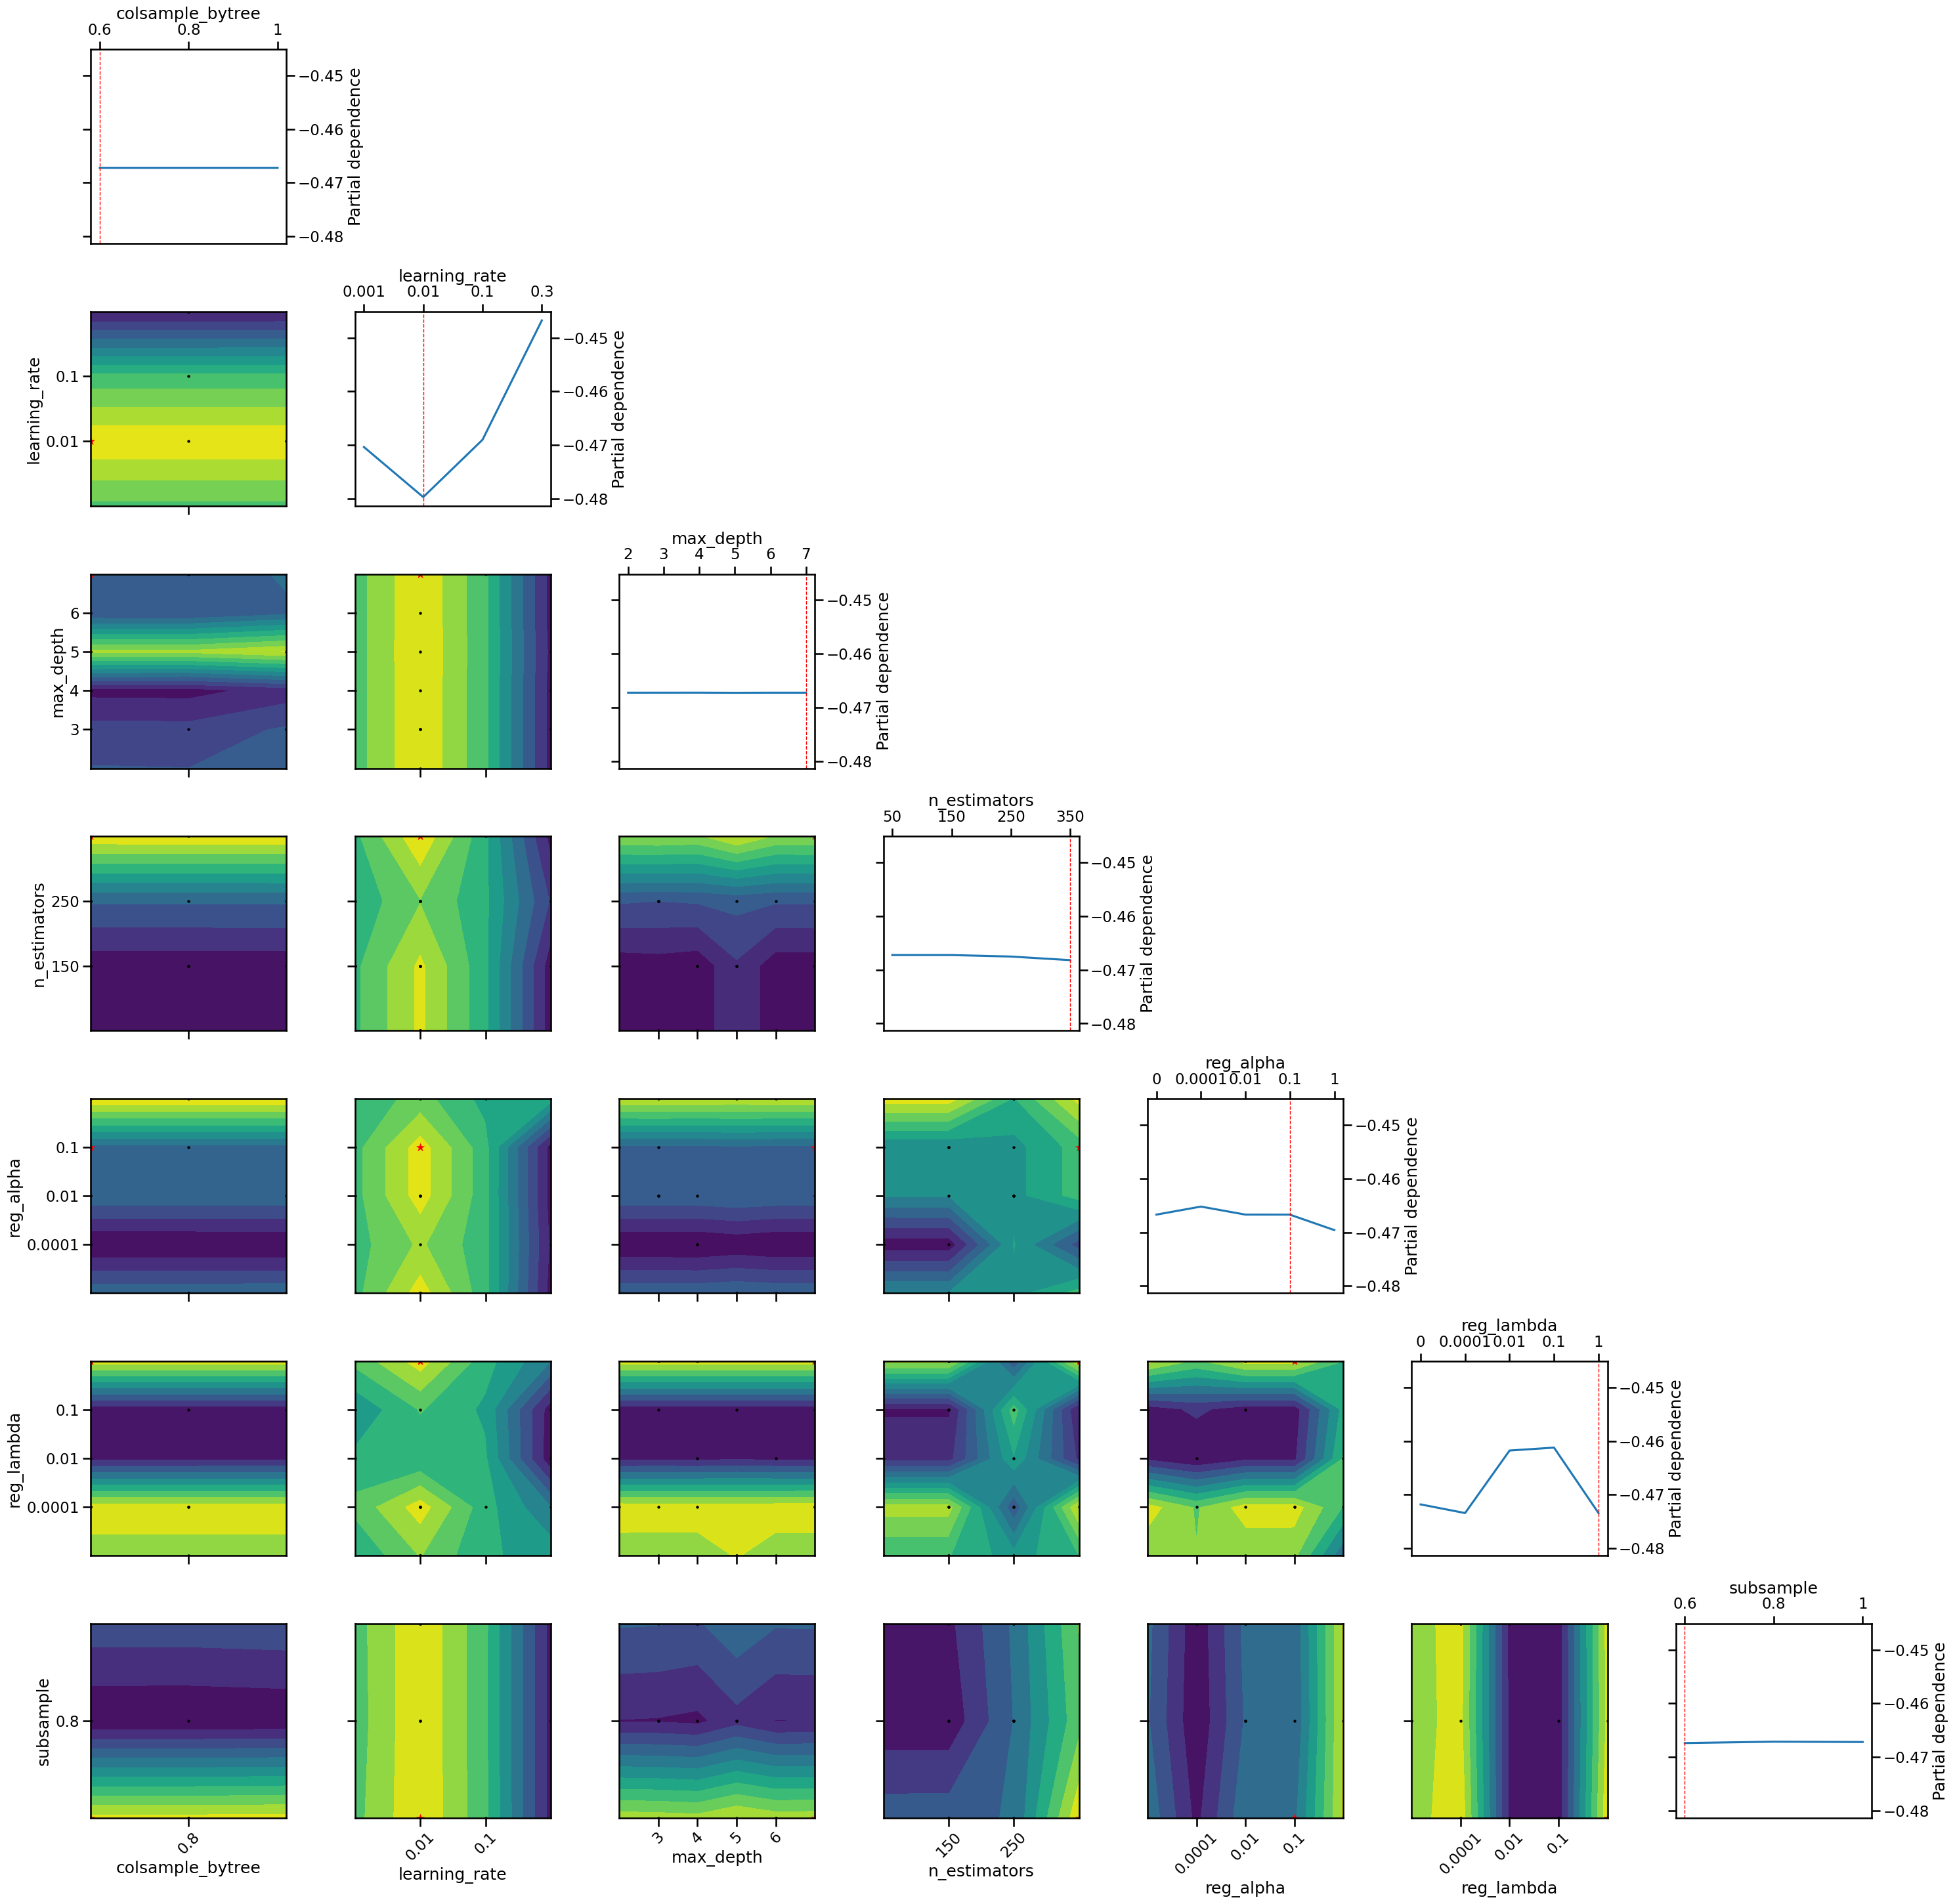


Train Metrics: {'mse': 0.004629411954762, 'mae': 0.04391367639496123, 'r2': 0.7749995815607759, 'pearson_corr': 0.9438916689062116, 'connectome_corr': 0.9226731490810423, 'connectome_r2': 0.7644074981903142, 'geodesic_distance': 9.158334750808603}
Test Metrics: {'mse': 0.01664417153525643, 'mae': 0.0896063862911998, 'r2': -0.19852125735402457, 'pearson_corr': 0.6864785448012414, 'connectome_corr': 0.37033612014017875, 'connectome_r2': -0.3491246374931093, 'geodesic_distance': 5.165118875054439}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'ma

In [10]:
trans_to_func_xgboost_sim_results = single_sim_run(
                        cv_type='random',
                        model_type='xgboost',
                        feature_type=['transcriptome'],
                        connectome_target='FC',
                        use_gpu=True,
                        use_shared_regions=False,
                        test_shared_regions=False,
                        save_sim=True,
                        resolution=1.01,
                        random_seed=42,
                        search_method=('bayes', 'pearson')
                        )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(6320, 22106) (6320,) (1122, 22106) (1122,)
2
3
ACCELERATING
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.995, test=0.591) total time=   1.4s
[CV 2/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=0.998, test=0.517) total time=   1.1s
[CV 1/2] END colsample_bytree=0.6, device=cuda, learning_rate=0.001, max_depth=6, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=1, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=(train=0.850, test=0.677) total time=   2.6s
[CV 2/2] END cols

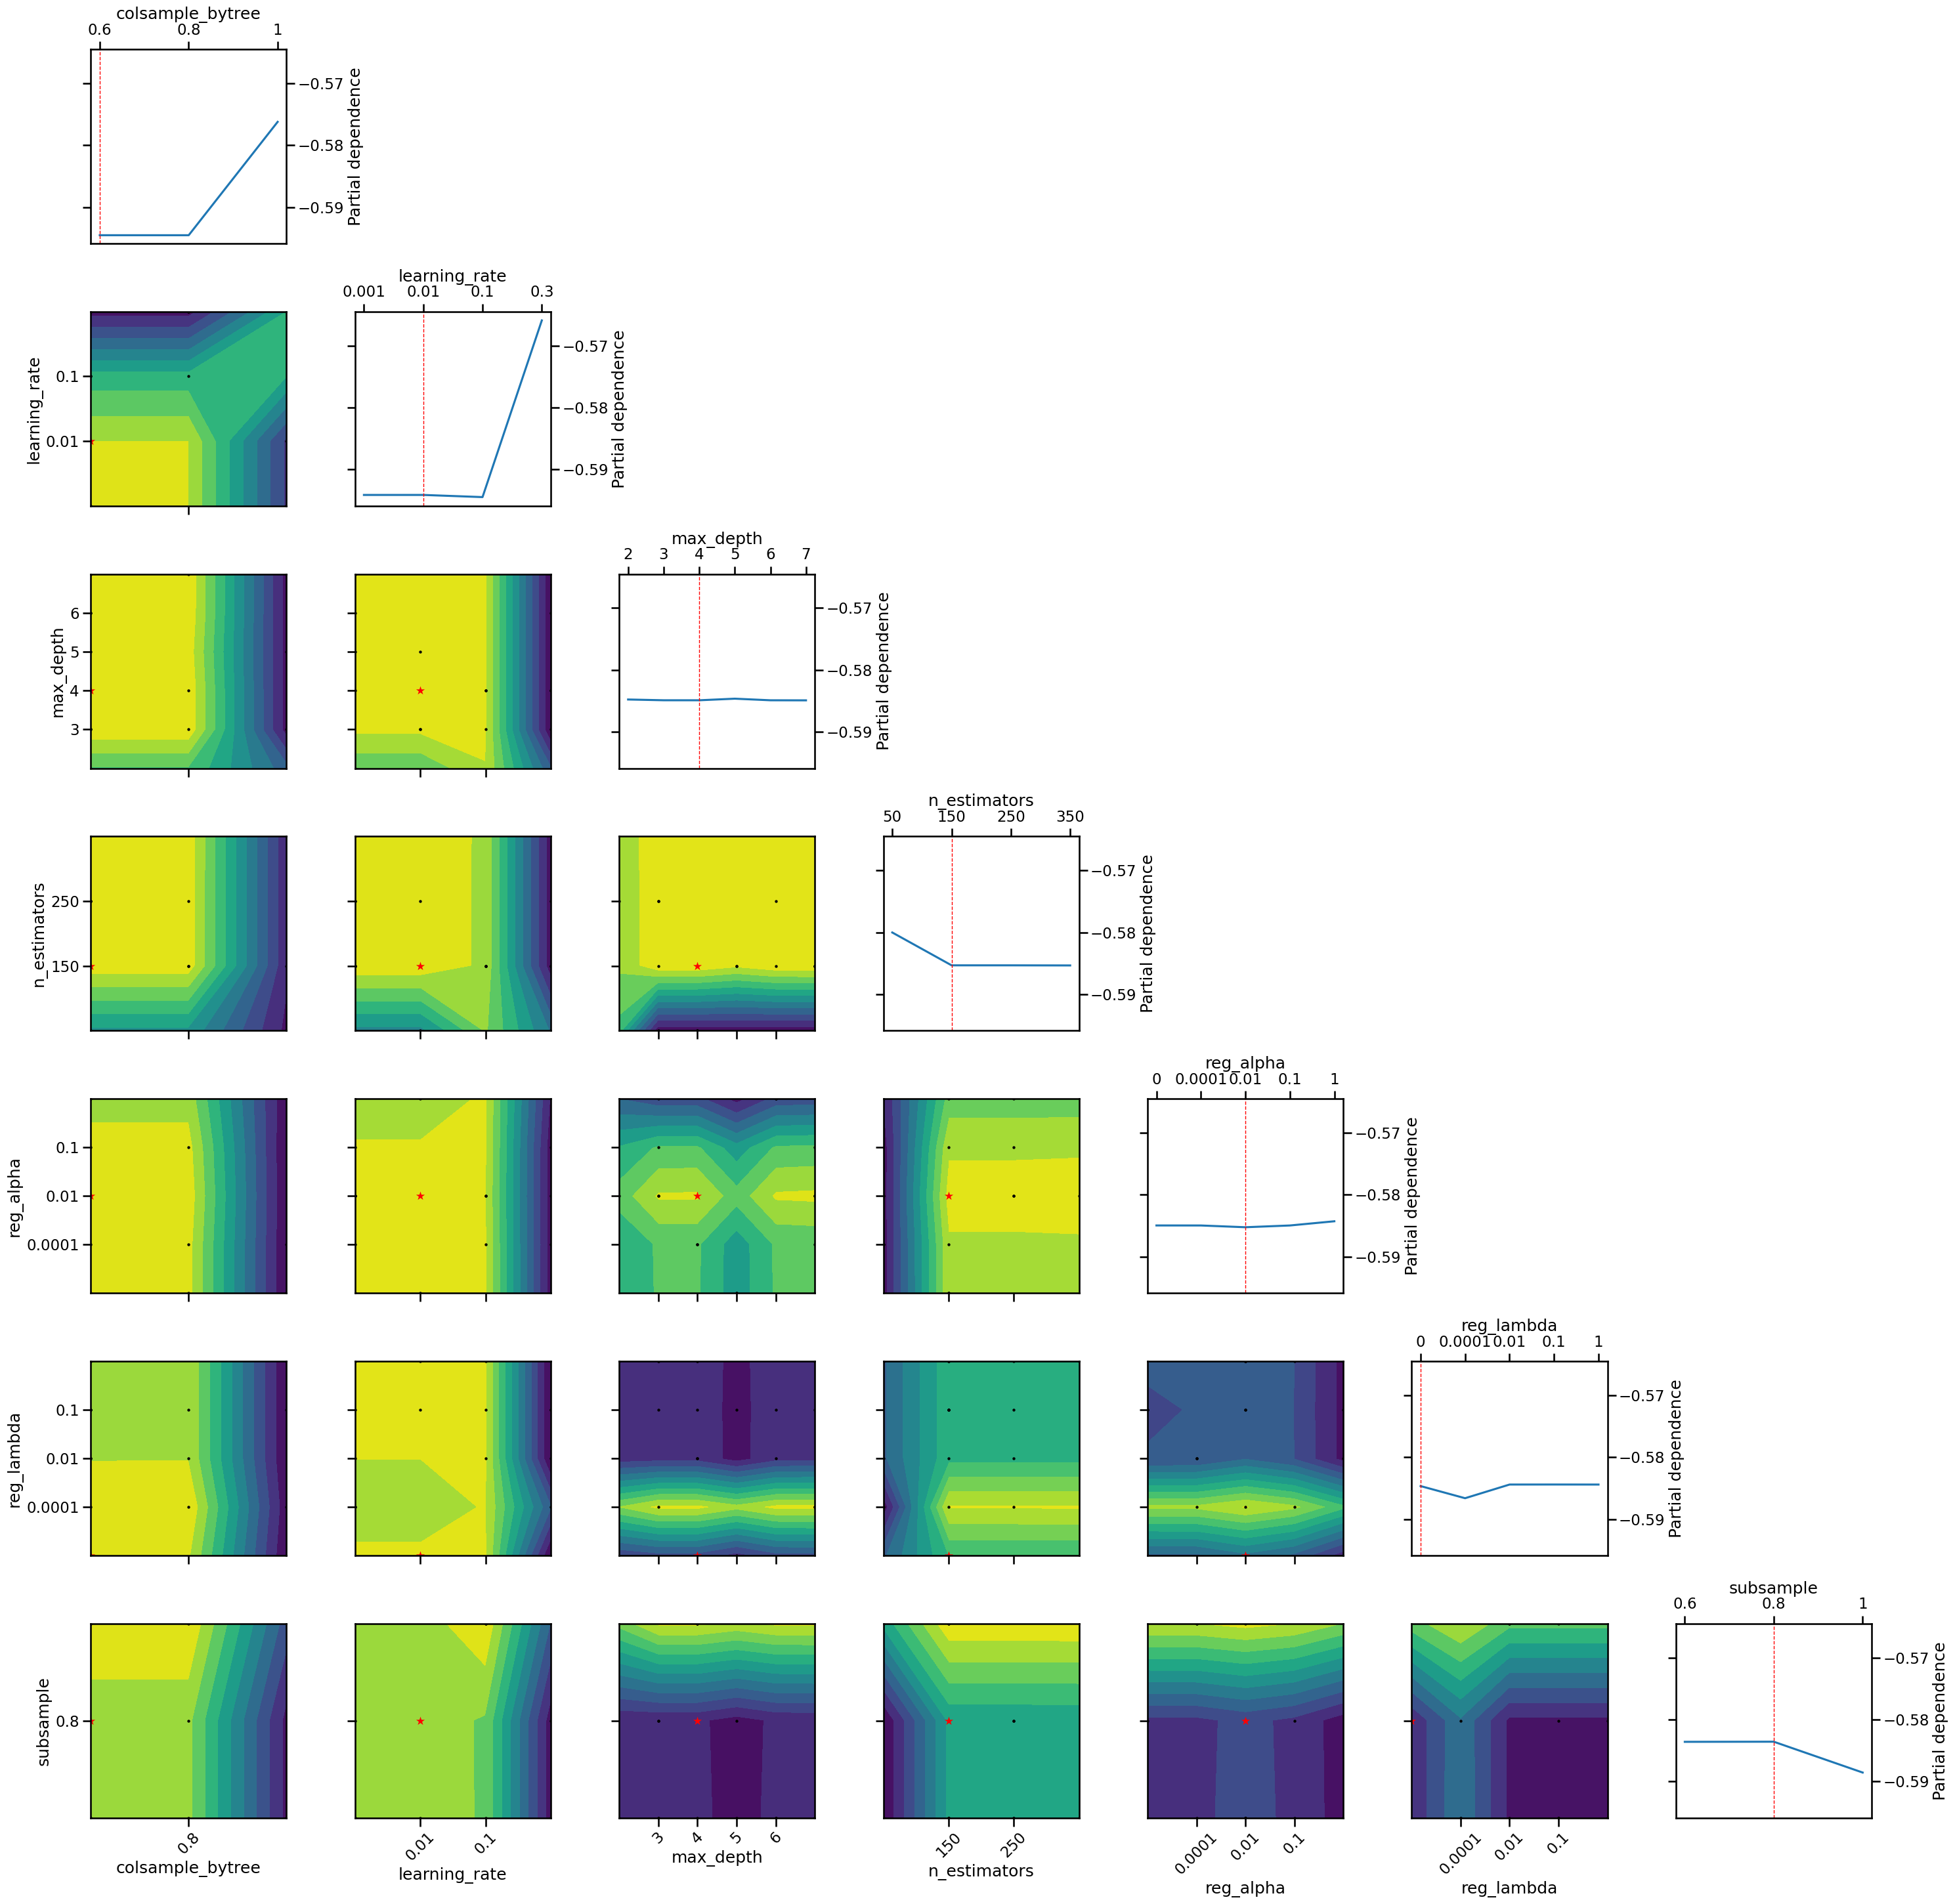


Train Metrics: {'mse': 0.019858081657885114, 'mae': 0.10171063671877063, 'r2': -0.20896416712963176, 'pearson_corr': 0.6535891119439745, 'connectome_corr': 0.5841423987335382, 'connectome_r2': -0.2652182946613507, 'geodesic_distance': 10.104645374608673}
Test Metrics: {'mse': 0.06790998669029376, 'mae': 0.19393064878935387, 'r2': -0.9260219262766131, 'pearson_corr': 0.6225179473020153, 'connectome_corr': 0.4576325444157608, 'connectome_r2': -1.3850680497290295, 'geodesic_distance': 6.55831968894332}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None

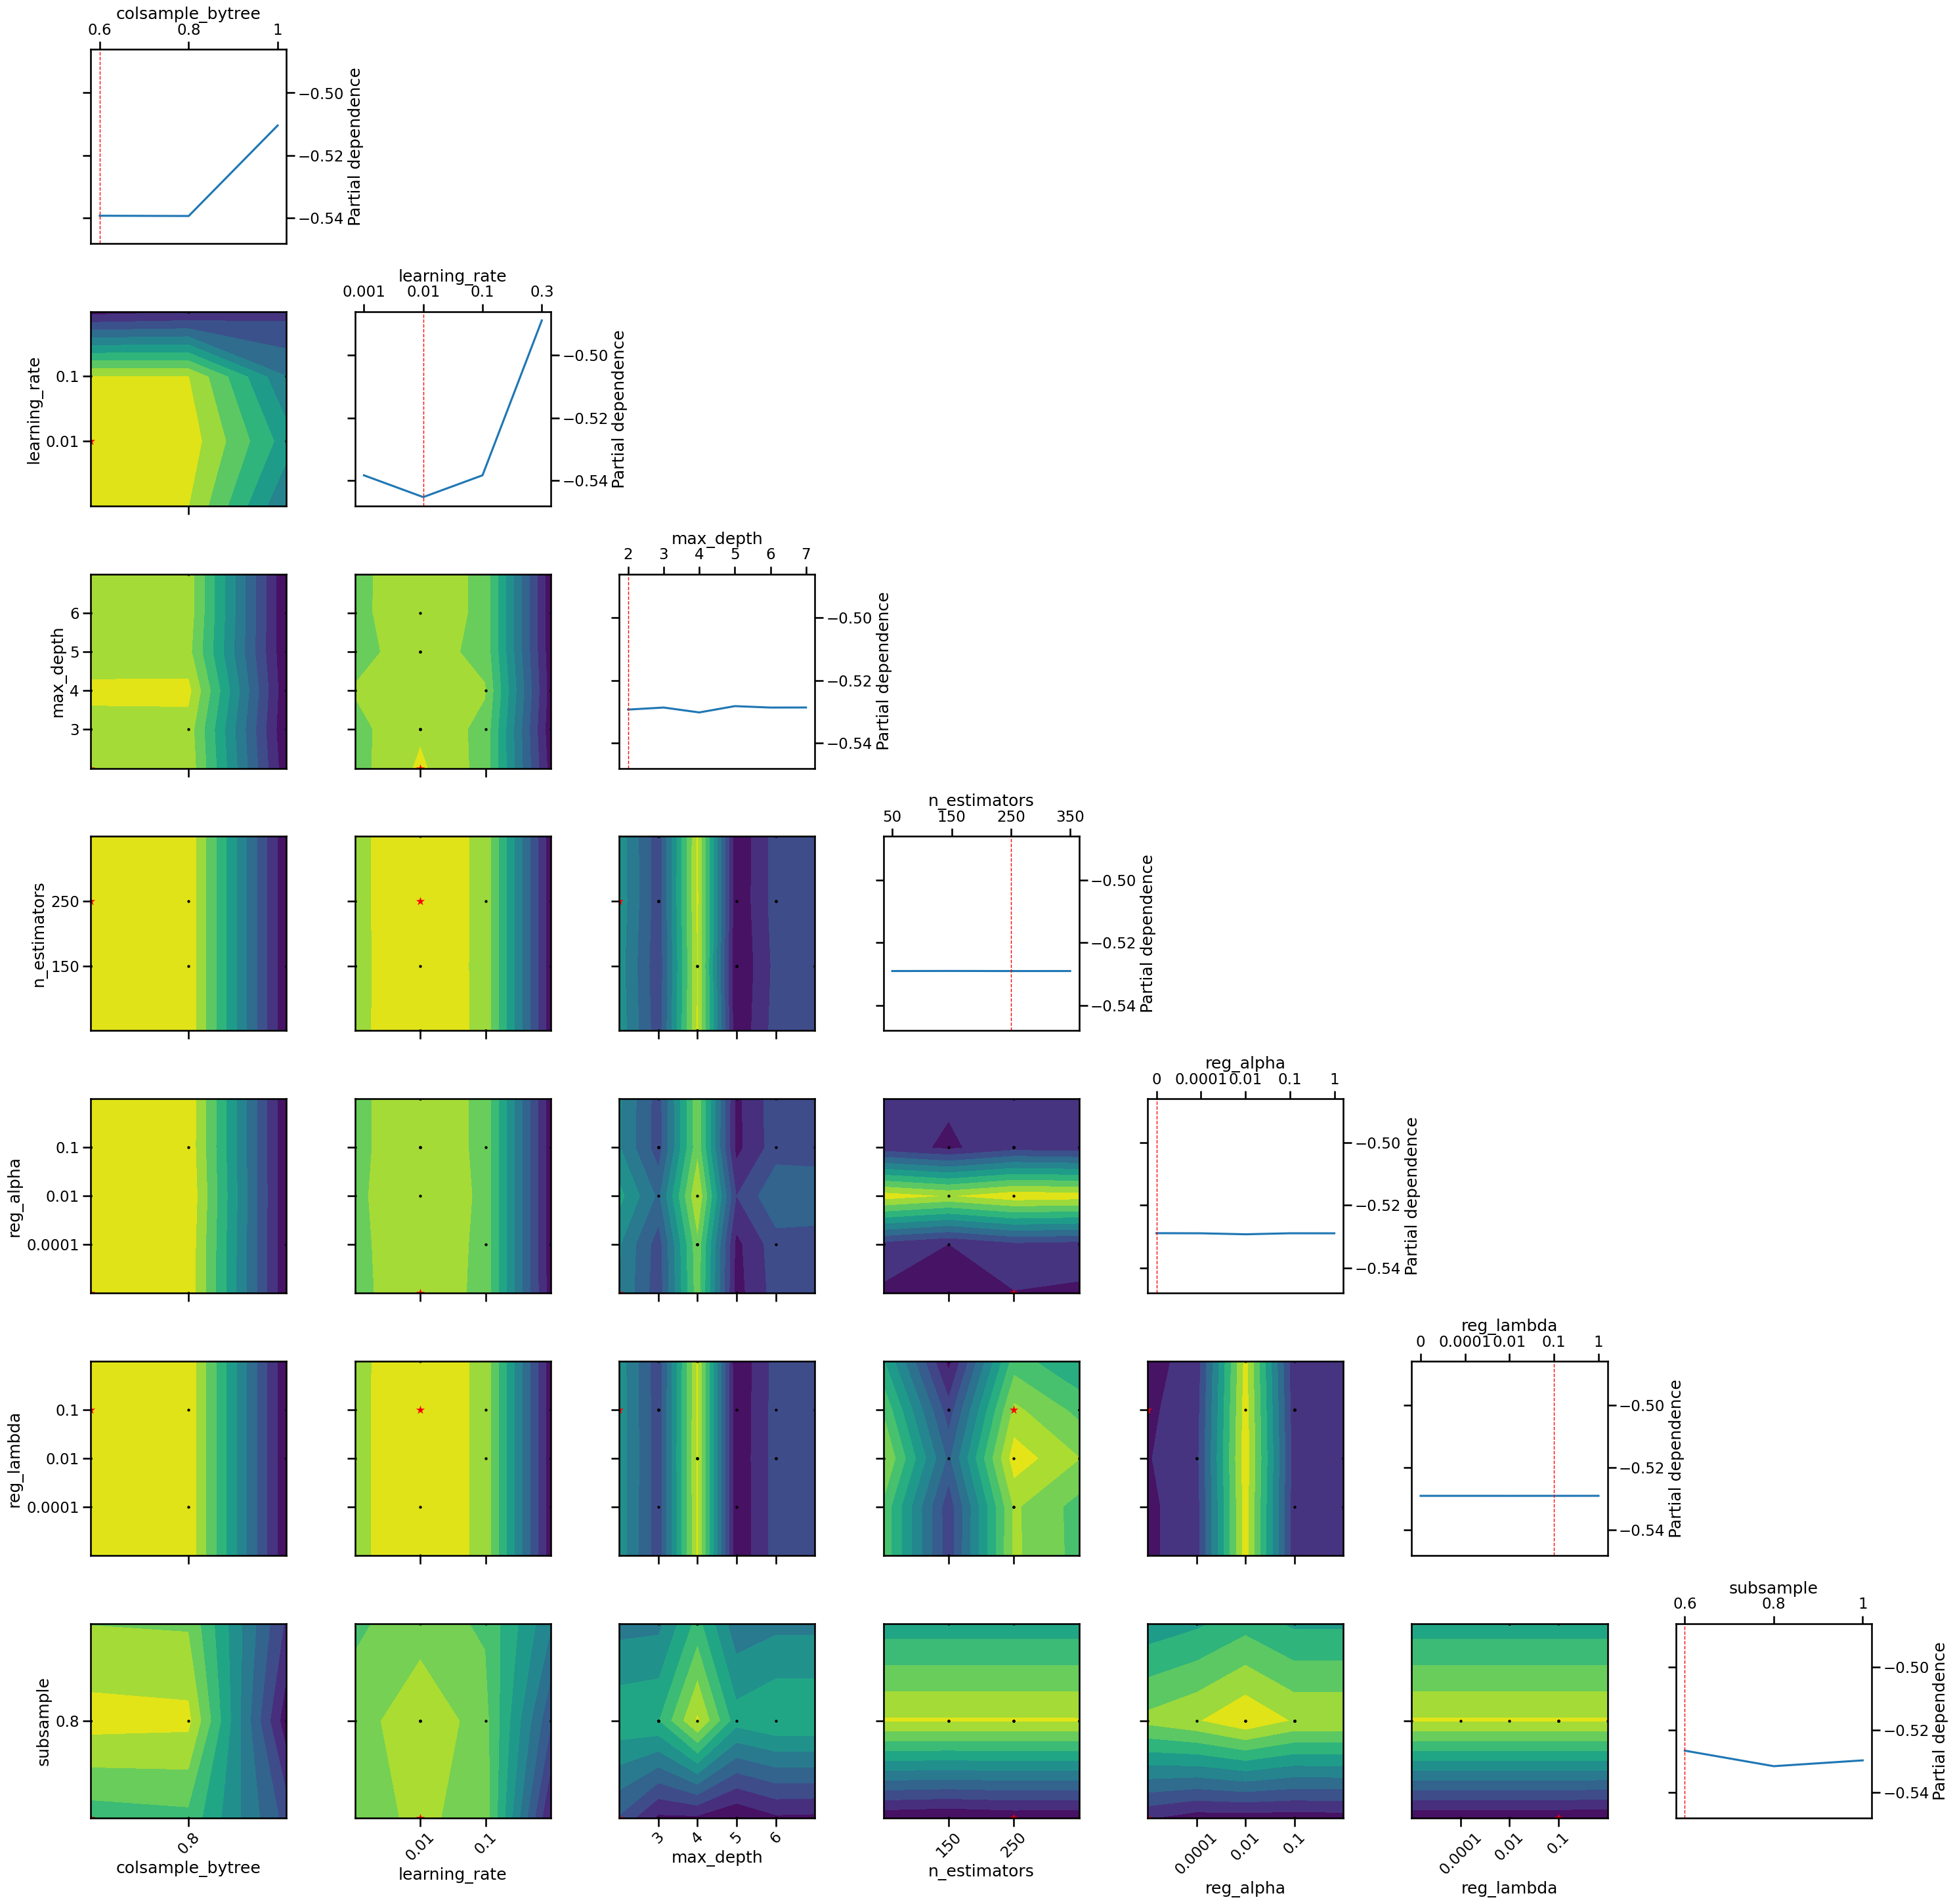


Train Metrics: {'mse': 0.021135739280063466, 'mae': 0.099745973652672, 'r2': -0.5008189491091349, 'pearson_corr': 0.6607937115634355, 'connectome_corr': 0.499754778297431, 'connectome_r2': -0.5764856396016597, 'geodesic_distance': 10.517371582751009}
Test Metrics: {'mse': 0.04271194218187231, 'mae': 0.15979899250118024, 'r2': -2.487989982497428, 'pearson_corr': 0.7334760901891633, 'connectome_corr': 0.5388009504189344, 'connectome_r2': -3.7973386137560503, 'geodesic_distance': 6.153388182747571}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'm

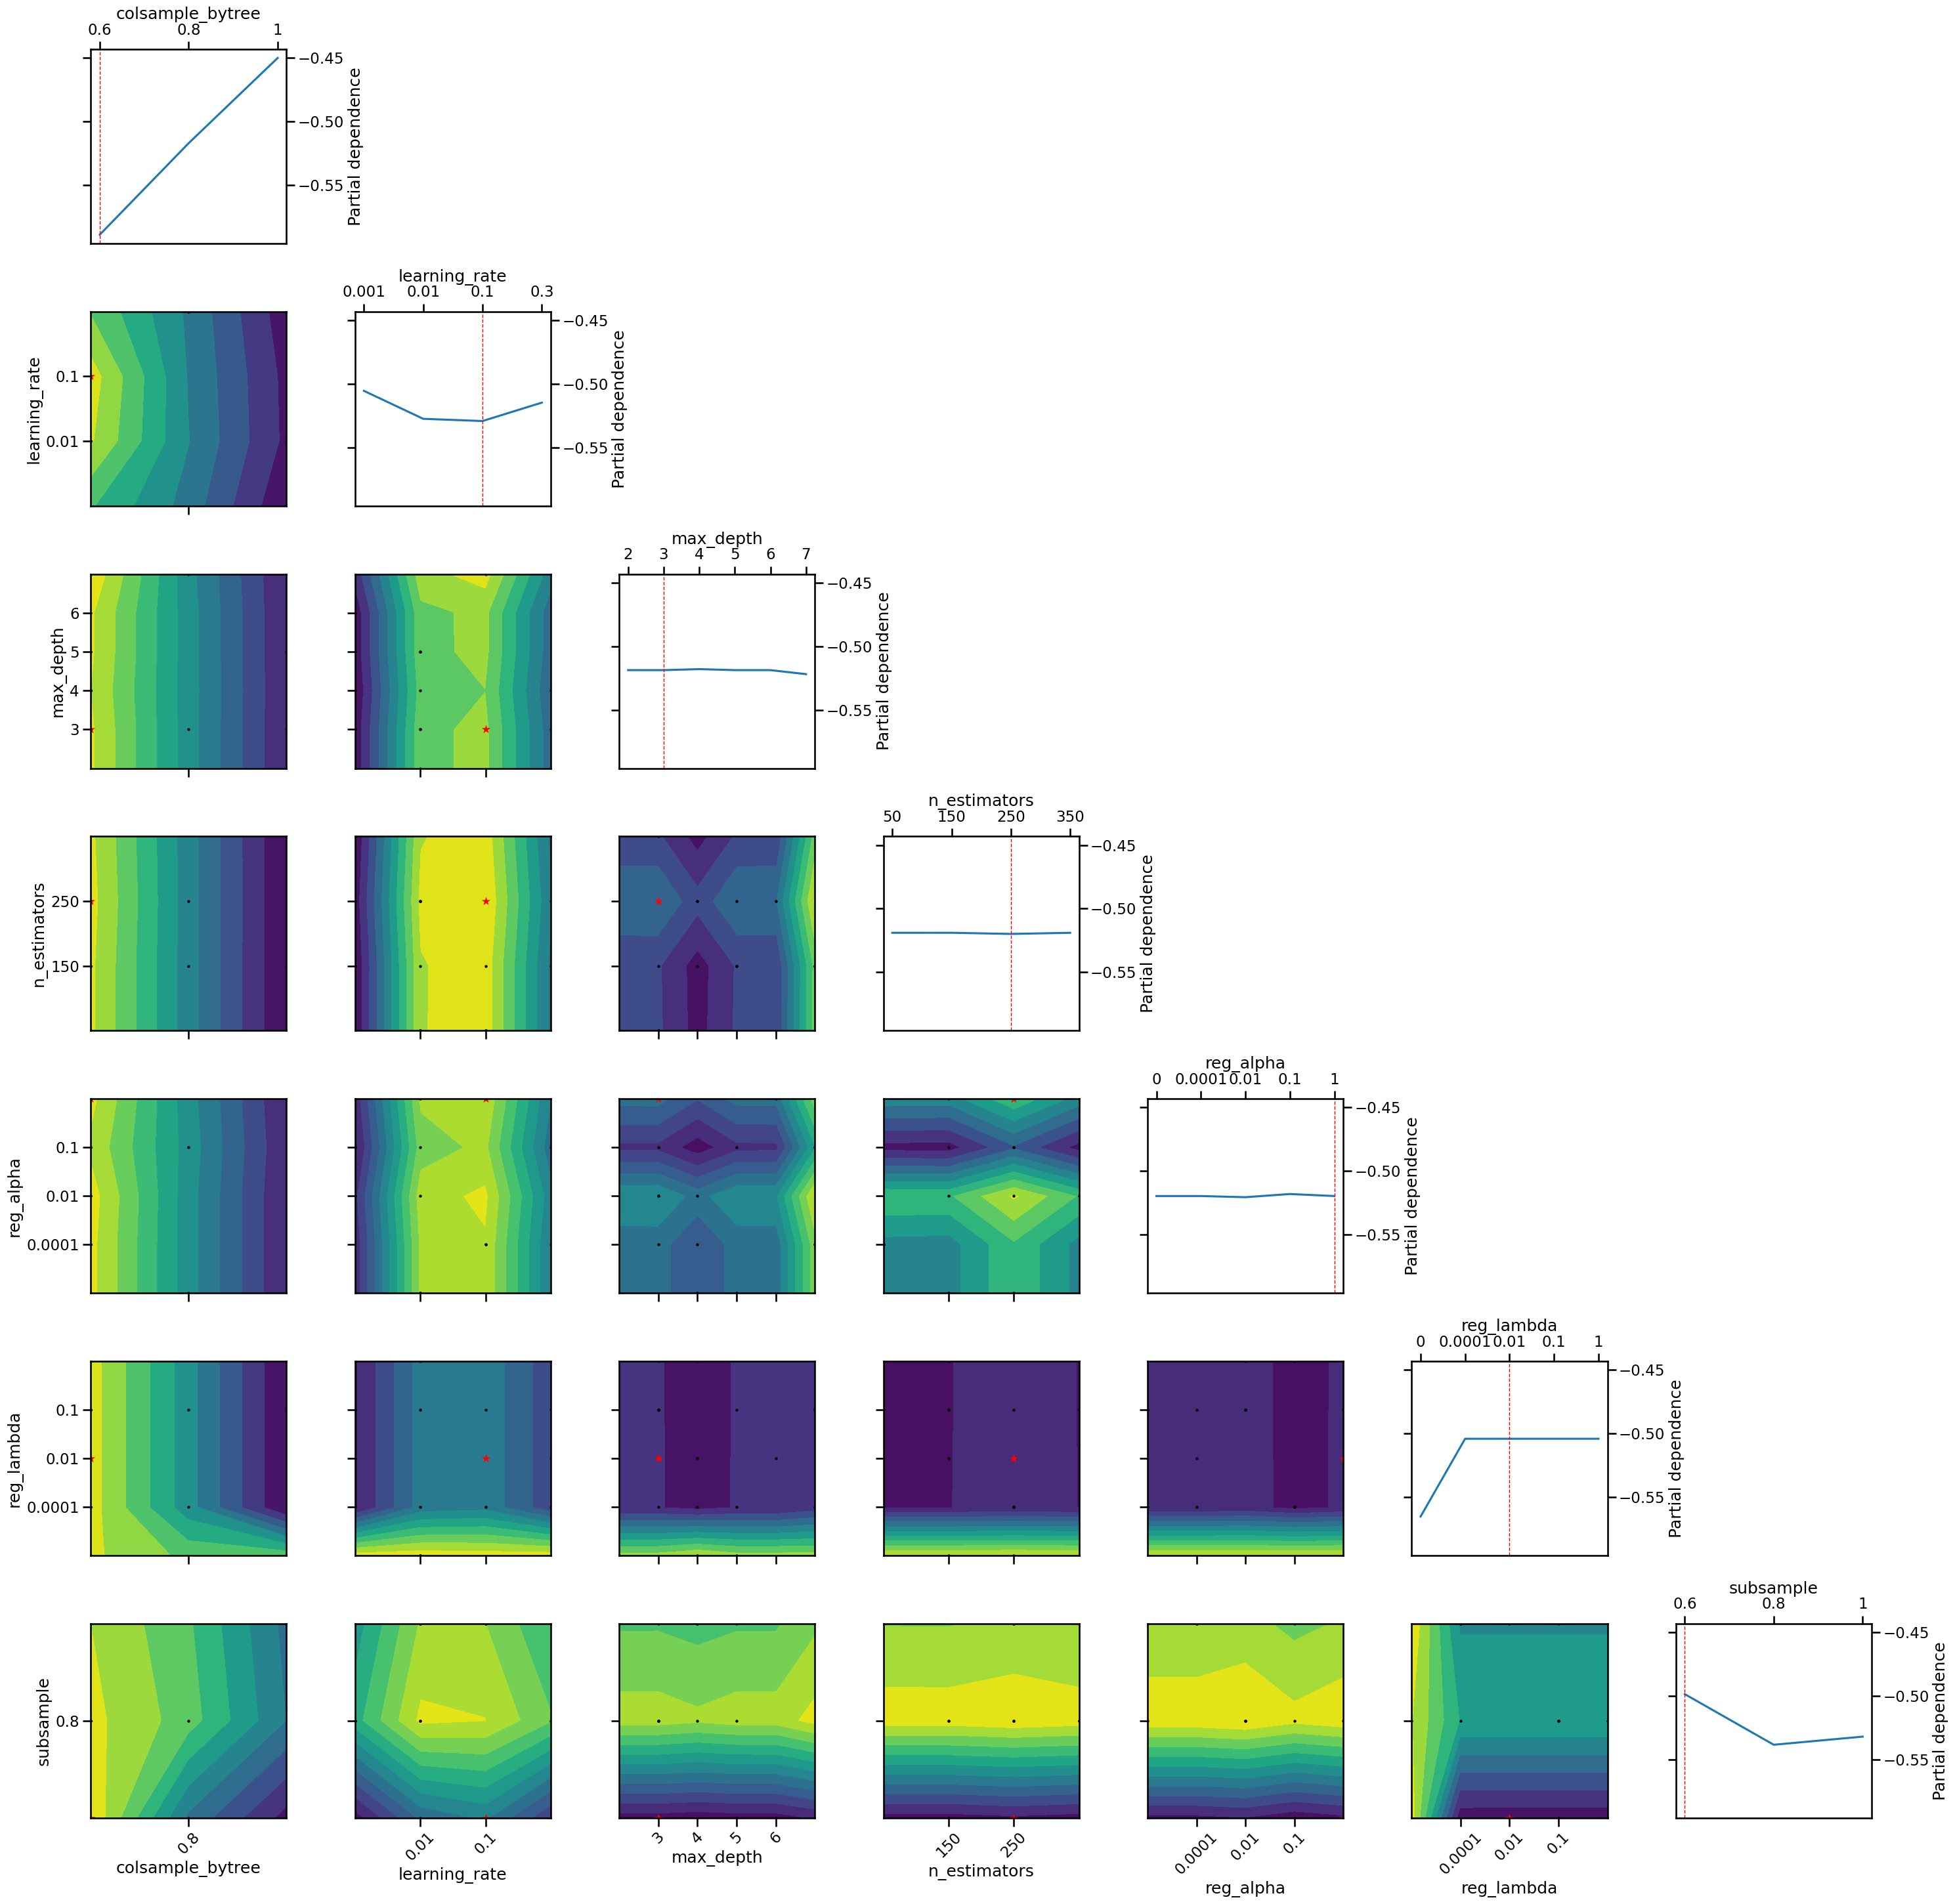


Train Metrics: {'mse': 0.0044596171279475795, 'mae': 0.04427763170983106, 'r2': 0.7574326428133159, 'pearson_corr': 0.9457023774284259, 'connectome_corr': 0.8883648436420806, 'connectome_r2': 0.7326528057088569, 'geodesic_distance': 7.340977001922811}
Test Metrics: {'mse': 0.031265405110078616, 'mae': 0.14291068885876665, 'r2': -4.9179420138913335, 'pearson_corr': 0.5966838703942172, 'connectome_corr': 0.4588263308359493, 'connectome_r2': -5.605710223265905, 'geodesic_distance': 6.166788417735034}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, '

In [11]:
trans_to_func_xgboost_sim_results = single_sim_run(
                        cv_type='community',
                        model_type='xgboost',
                        feature_type=['transcriptome'],
                        connectome_target='FC',
                        use_gpu=True,
                        use_shared_regions=False,
                        test_shared_regions=False,
                        save_sim=True,
                        resolution=1.01,
                        random_seed=42,
                        search_method=('bayes', 'pearson')
                        )

### Transcriptome PCA kronecker + additional features

Number of components explaining 95.0% of the variance: 34
self.Y_sc [[ 0.      8.274   9.3887 ...  0.      4.804   4.9657]
 [ 8.274   0.     10.397  ...  0.      0.      4.2923]
 [ 9.3887 10.397   0.     ...  2.2859  0.      4.2418]
 ...
 [ 0.      0.      2.2859 ...  0.     10.888   9.2242]
 [ 4.804   0.      0.     ... 10.888   0.      9.2048]
 [ 4.9657  4.2923  4.2418 ...  9.2242  9.2048  0.    ]]
self X shape (114, 34)
summary measure kronecker
PC dim 34
Processing fold 0...
Fold 0 shapes - X_train: (7140, 1156), X_test: (812, 1156), Y_train: (7140,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_train: (7140, 1156), X_test: (812, 1156), Y_train: (7140,), Y_test: (812,)
Processing fold 2...
Fold 2 shapes - X_train: (7310, 1156), X_test: (756, 1156), Y_train: (7310,), Y_test: (756,)
Processing fold 3...
Fold 3 shapes - X_train: (7310, 1156), X_test: (756, 1156), Y_train: (7310,), Y_test: (756,)

 Test fold num: 1
(7140, 1156) (7140,) (812, 1156) (812,)
2
3
4
Processing fold 

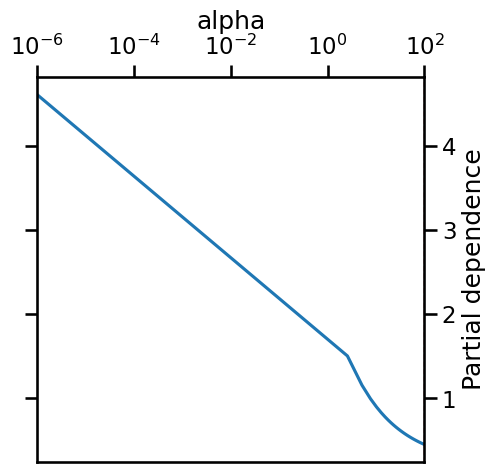


Train Metrics: {'mse': 0.016408226149000768, 'mae': 0.09693619108553203, 'r2': -2.042222538216797, 'pearson_corr': 0.7357106932272083, 'connectome_corr': 0.6454036255202632, 'connectome_r2': -2.2187271452446904, 'geodesic_distance': 9.384263767126363}
Test Metrics: {'mse': 0.05287042894585237, 'mae': 0.17595293834986847, 'r2': -11.96348067813726, 'pearson_corr': 0.19588917045248785, 'connectome_corr': 0.1302912301234239, 'connectome_r2': -14.04712025654305, 'geodesic_distance': 7.768060795941001}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 2
(7140, 1156) (7140,) (812, 1156) (812,)
1
3
4
Processing fold 0...
Fold 0 shapes - X_train: (3080, 1156), X_test: (812, 1156), Y_train: (3080,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_tra

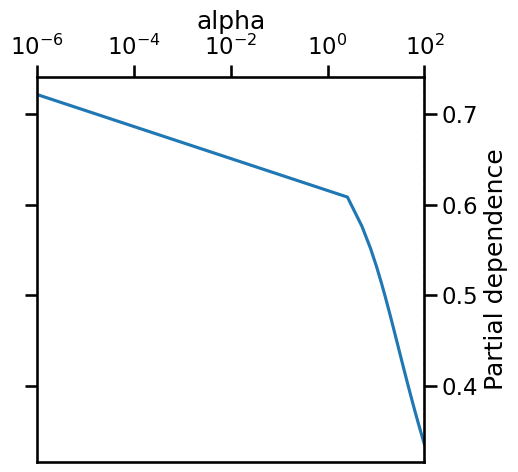


Train Metrics: {'mse': 0.015448373884232572, 'mae': 0.09176956226671862, 'r2': -1.0938842276944896, 'pearson_corr': 0.7187247920080941, 'connectome_corr': 0.6702143462032842, 'connectome_r2': -1.2022134411233216, 'geodesic_distance': 9.13313209498156}
Test Metrics: {'mse': 0.05747032014639485, 'mae': 0.1636016893678515, 'r2': -76.46338015444222, 'pearson_corr': 0.327586730510574, 'connectome_corr': 0.29098229796695757, 'connectome_r2': -89.15905315053423, 'geodesic_distance': 10.526760266839803}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 3.3%
RAM Usage: 5.4%
Available RAM: 356.4G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 3
(7310, 1156) (7310,) (756, 1156) (756,)
1
2
4
Processing fold 0...
Fold 0 shapes - X_train: (3192, 1156), X_test: (812, 1156), Y_train: (3192,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_trai

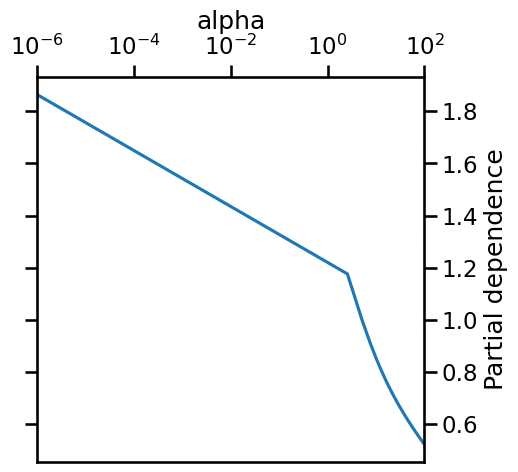


Train Metrics: {'mse': 0.0143837233105388, 'mae': 0.09008897552130546, 'r2': -1.9328284212461126, 'pearson_corr': 0.761244810433646, 'connectome_corr': 0.6797819421796387, 'connectome_r2': -2.0909021383274617, 'geodesic_distance': 9.818748598728542}
Test Metrics: {'mse': 0.04796617353703664, 'mae': 0.16244165335677624, 'r2': -2.1907576424144444, 'pearson_corr': 0.2869332610092983, 'connectome_corr': 0.22363646351564276, 'connectome_r2': -3.1639035847584593, 'geodesic_distance': 7.338227351594684}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 4
(7310, 1156) (7310,) (756, 1156) (756,)
1
2
3
Processing fold 0...
Fold 0 shapes - X_train: (3192, 1156), X_test: (812, 1156), Y_train: (3192,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_tra

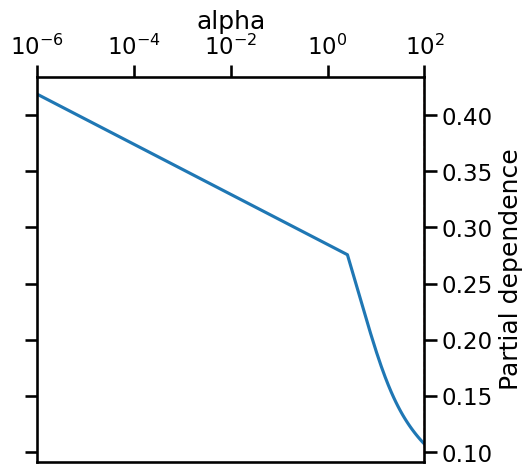


Train Metrics: {'mse': 0.016054630349966275, 'mae': 0.09392511928686577, 'r2': -0.74031217447963, 'pearson_corr': 0.7268131475953713, 'connectome_corr': 0.6361685674666548, 'connectome_r2': -0.8596565992974071, 'geodesic_distance': 10.58482605551068}
Test Metrics: {'mse': 0.6180642402757791, 'mae': 0.33167294281547927, 'r2': -341.9771500927782, 'pearson_corr': 0.09349861495188108, 'connectome_corr': 0.3736095467790883, 'connectome_r2': -387.42324831628554, 'geodesic_distance': 9.13024374080444}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------


In [5]:
transPCAkron_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='ridge',
                                              feature_type=['transcriptomePCA'], # if you want to use transcriptomePCA with kronecker, you must start with transcriptomePCA in the feature_type list
                                              summary_measure='kronecker',
                                              use_gpu=False,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method=('bayes', 'mse')
                                              )

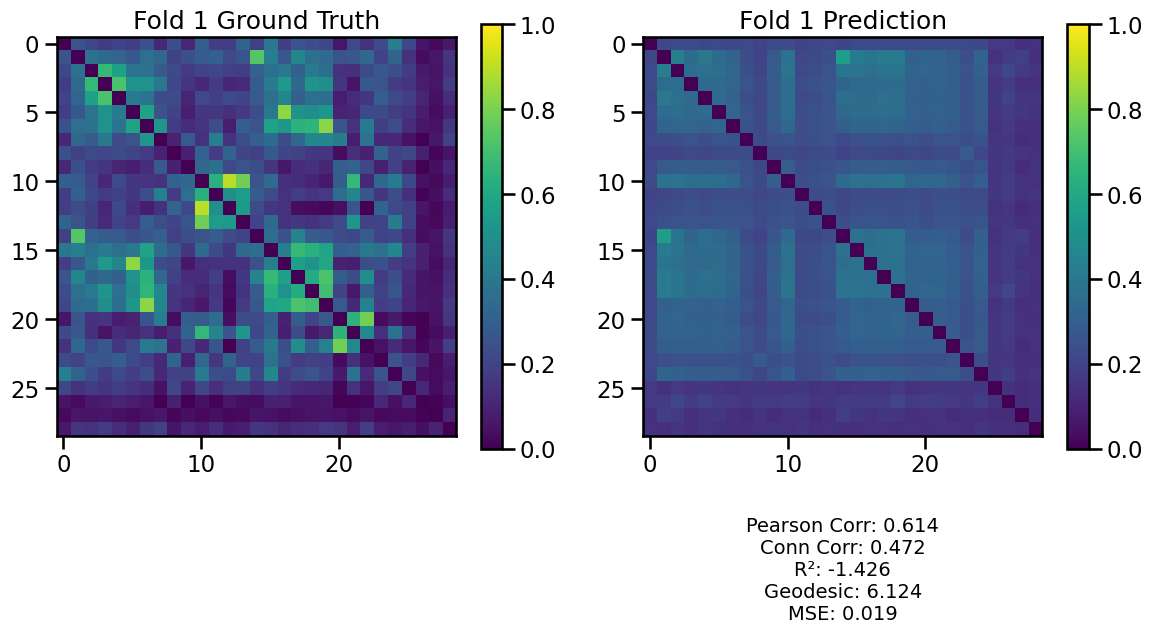

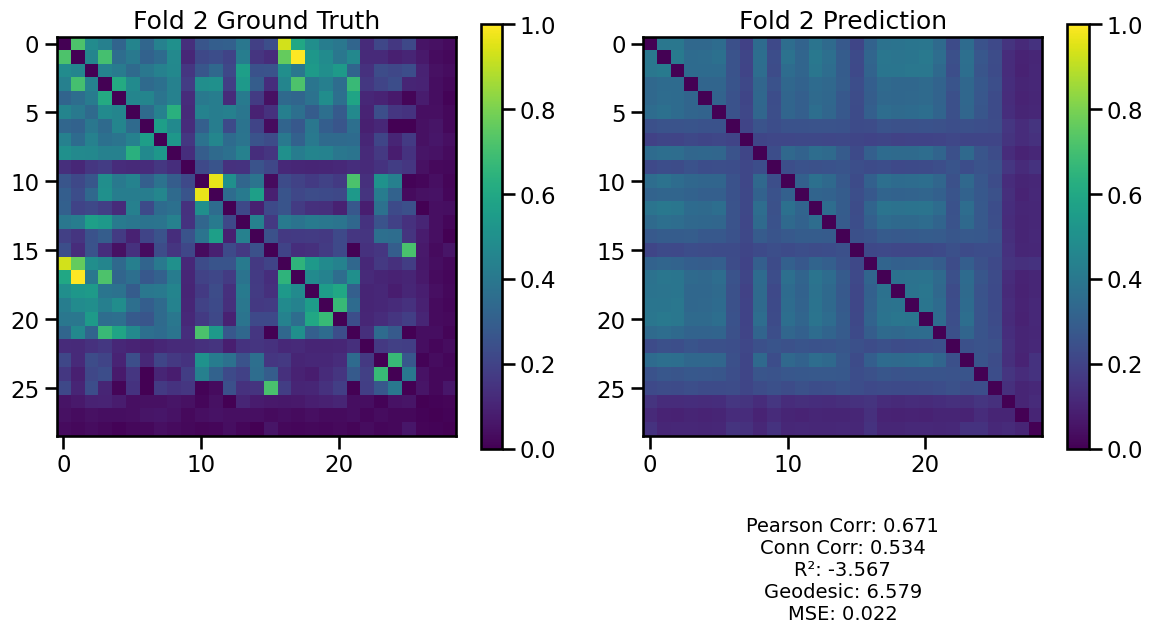

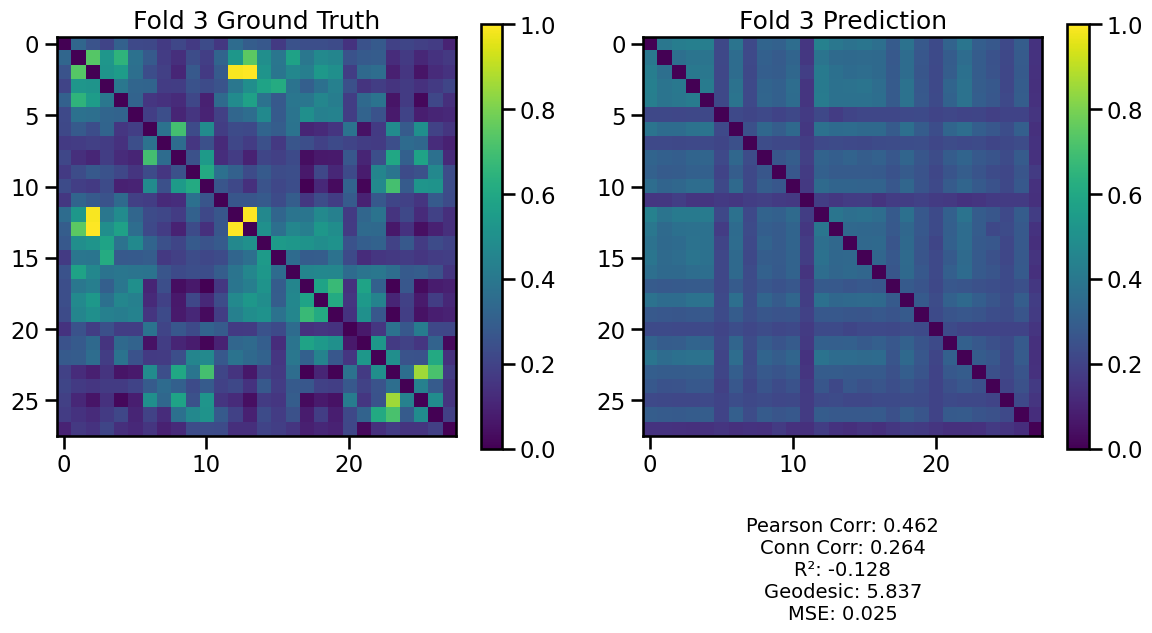

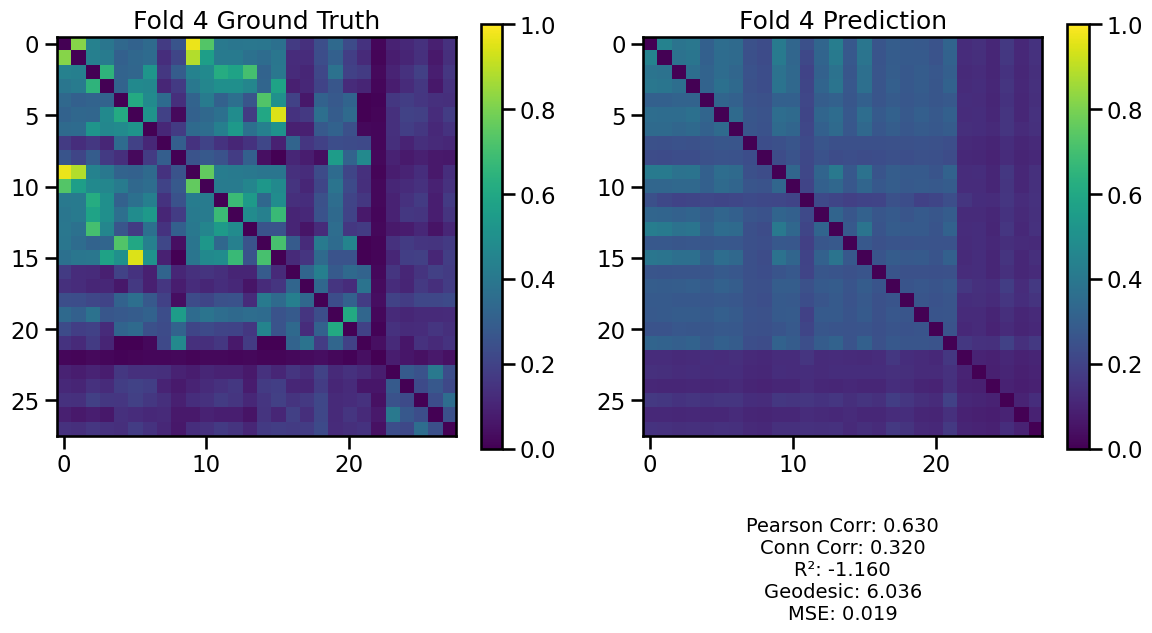

In [64]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_random_nonshared_sim_results)

### MLP test

In [6]:
custom_mlp_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='mlp',
                                              feature_type=['transcriptomePCA'],
                                              summary_measure=None,
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
self X shape (114, 34)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 68) (7140,) (812, 68) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
MLP input size 68
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.367 total time=   8.9s
[CV 2/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.152 total time=   1.2s
[CV 3/3] END batch_size=62, dropout=0.4183177229531975, epochs=473, l2_reg=4.2815319280763424e-05, lr=0.0021892527128216433;, score=-0.228 total time=   1.2s
[CV 1/3] END batch_size=62, dropout=0.3052794004697432, epochs=396, l2_reg=4.063746627400014e-05, lr=0

KeyboardInterrupt: 

In [ ]:
plot.plot_single_model_predictions_with_metrics(custom_xgb_random_nonshared_sim_results)

### Distance

In [57]:
# Extract the coordinates from the DataFrame
coordinates = load_coords()

# Compute pairwise Euclidean distances
distance = squareform(pdist(coordinates, metric='euclidean'))

# Compute inverse of distance so closer regions have higher values
Y_dist = np.array(1/distance)

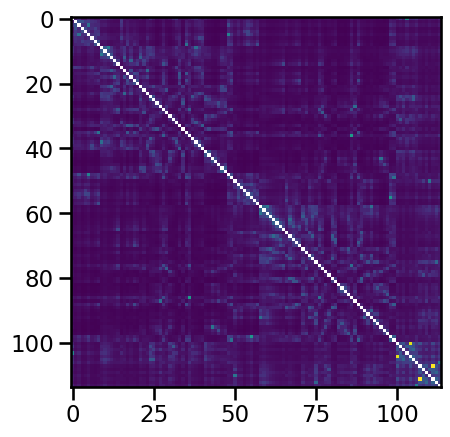

In [58]:
plt.imshow(Y_dist)

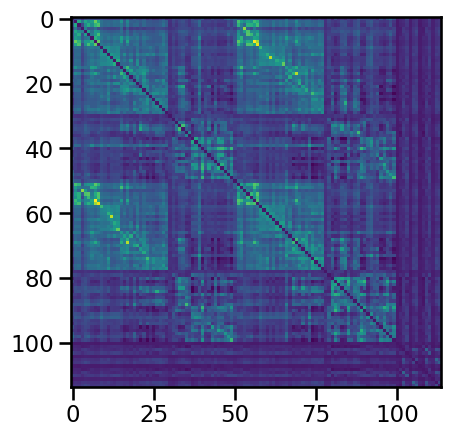

In [59]:
Y_fc = load_connectome()
plt.imshow(Y_fc)

#### Correlate distance-fMRI

In [60]:
# Flatten both matrices to compute the total correlation
np.fill_diagonal(Y_dist, val=0)
Y_dist = Y_dist.flatten()  # if it's a pandas DataFrame
Y_flat = Y_fc.flatten()  # Assuming Y is a numpy array

# Compute Pearson correlation between the flattened matrices
total_correlation = np.corrcoef(Y_dist, Y_flat)[0, 1]

# Print the total correlation value
print(f"Total Pearson correlation between the thresholded heatmap and true connectome: {total_correlation}")


Total Pearson correlation between the thresholded heatmap and true connectome: 0.18705201576764327


### Experiment Run for Euclidean Coordinates <a id="sims"></a>

In [26]:
euclid_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type='euclidean',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=True,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34


KeyError: 'e'

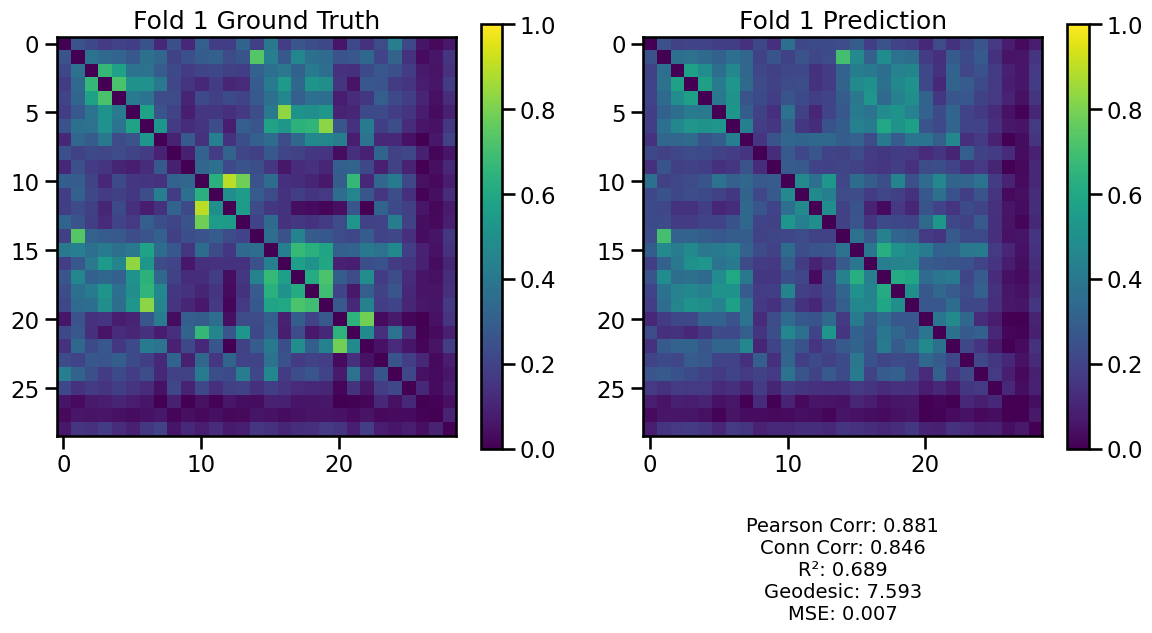

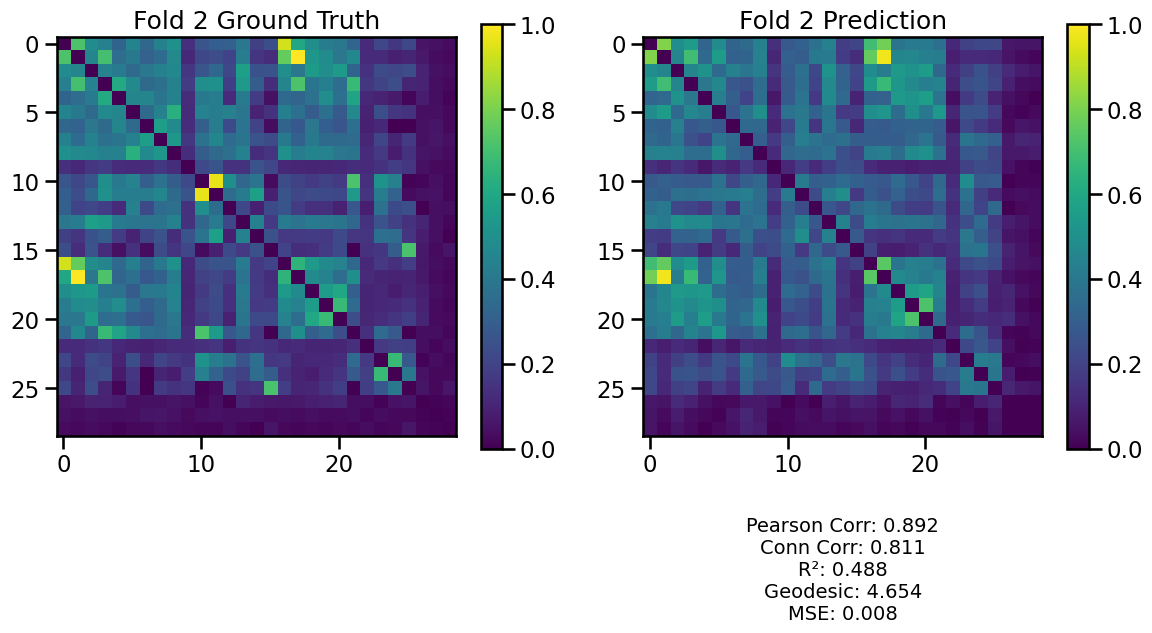

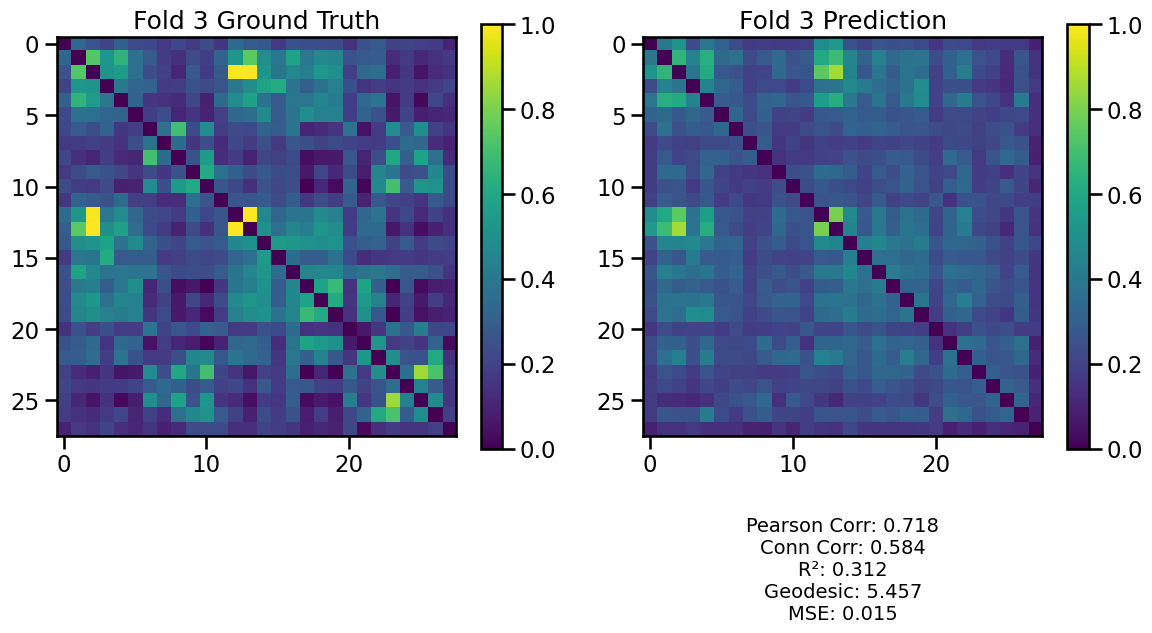

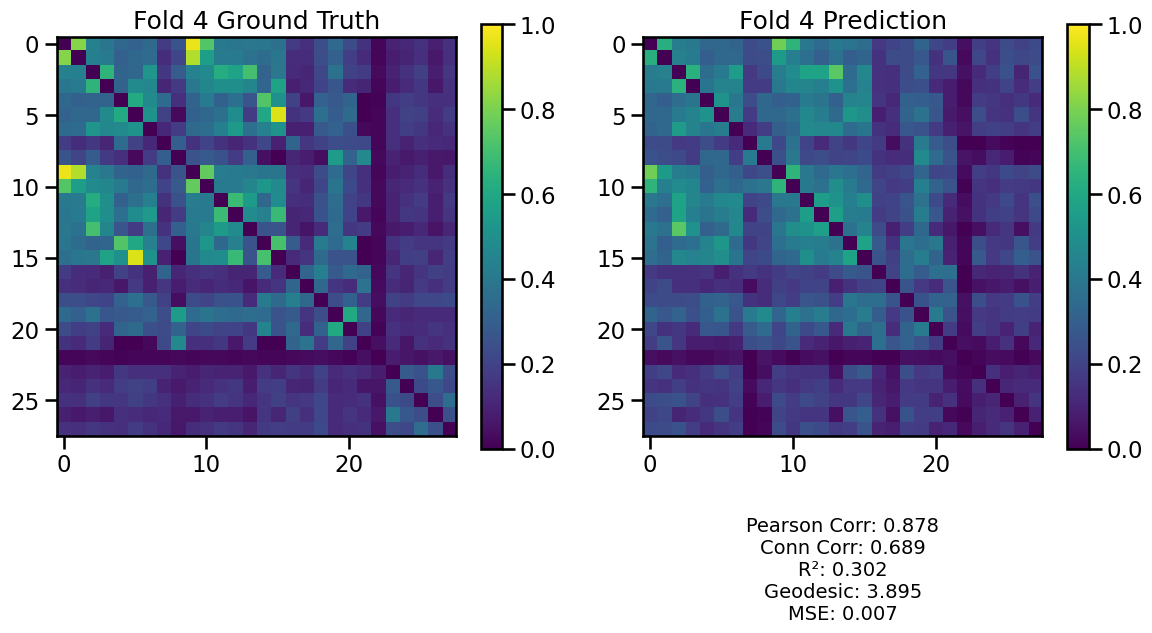

In [70]:
plot.plot_single_model_predictions_with_metrics(euclid_xgb_random_nonshared_sim_results)

Comparison to transcriptome for same split type

In [69]:
trans_sim_random_shared_xgb = multi_sim_run.open_pickled_results('single_sim_trans_bsearch_random_xgboost_useshared_trainshared.pickle')

plot.plot_single_model_predictions_with_metrics(trans_sim_random_shared_xgb)

In [64]:
trans_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(12070, 22106) (12070,) (812, 22106) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=hist, verbosity=2; total time=   3.4s
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=hist, verbosity=2; total time=   3.1s
[CV] END colsample_bytree=0.8, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tr

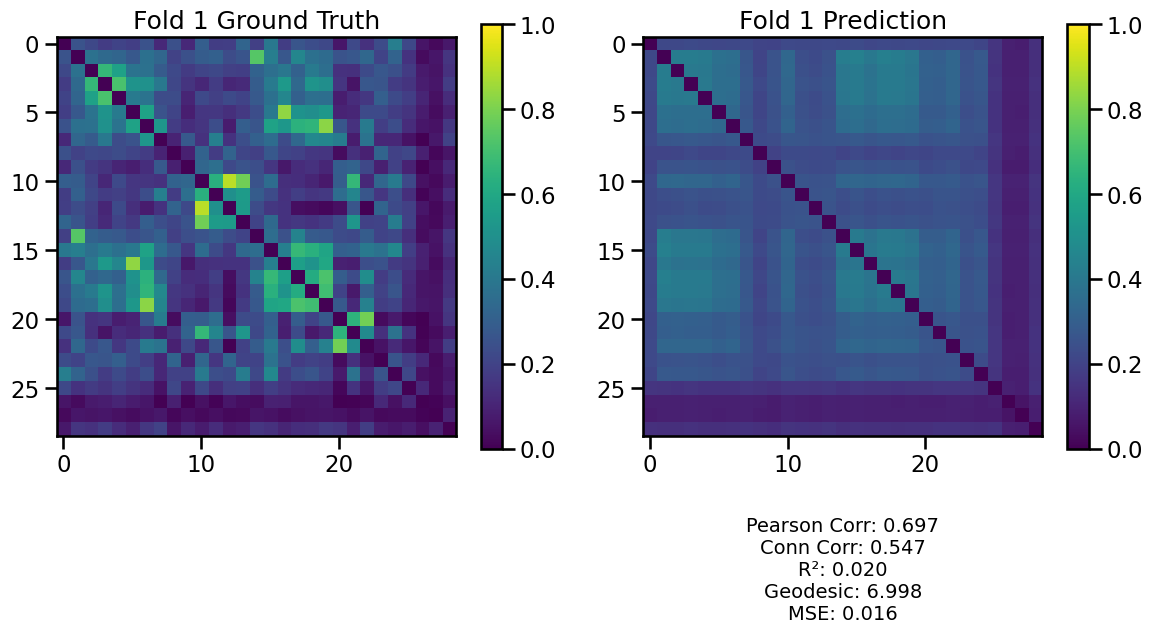

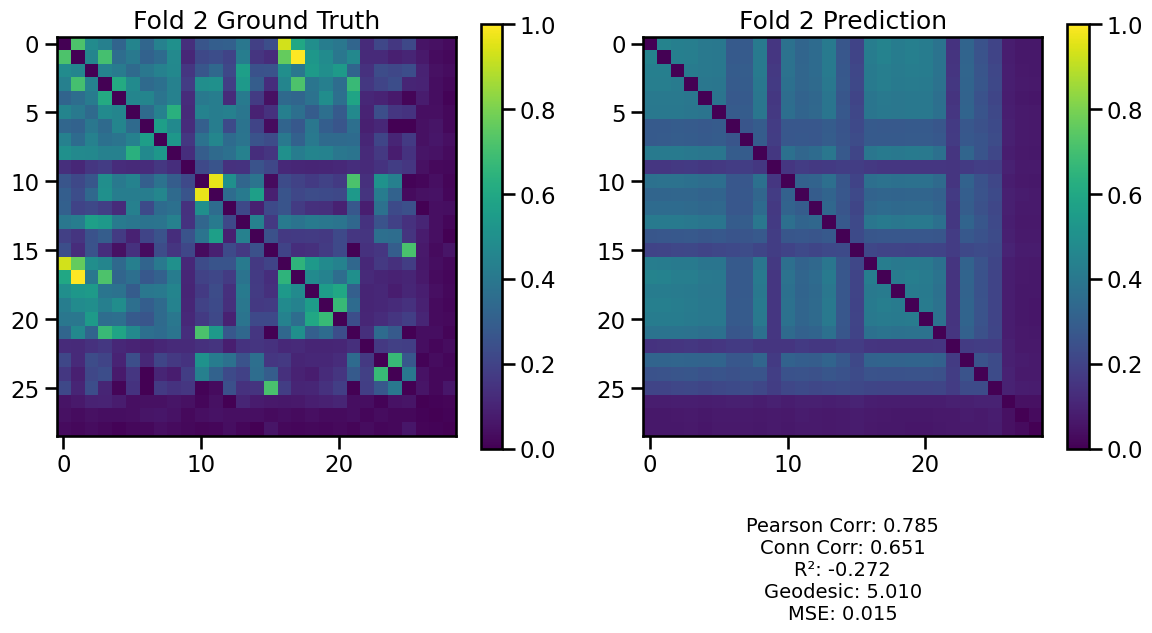

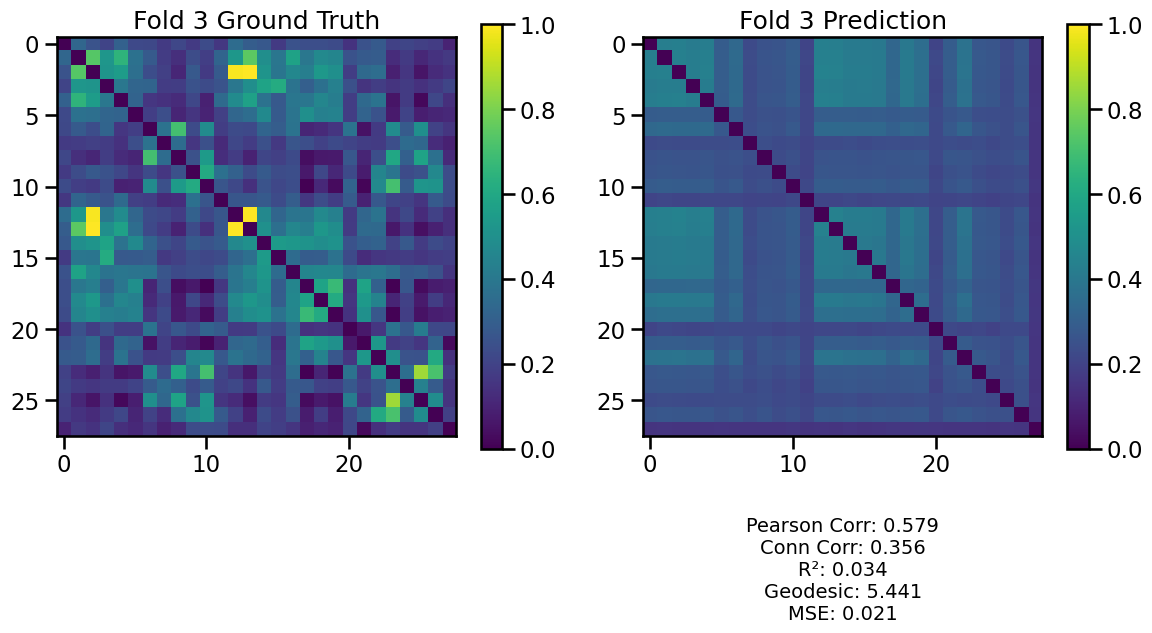

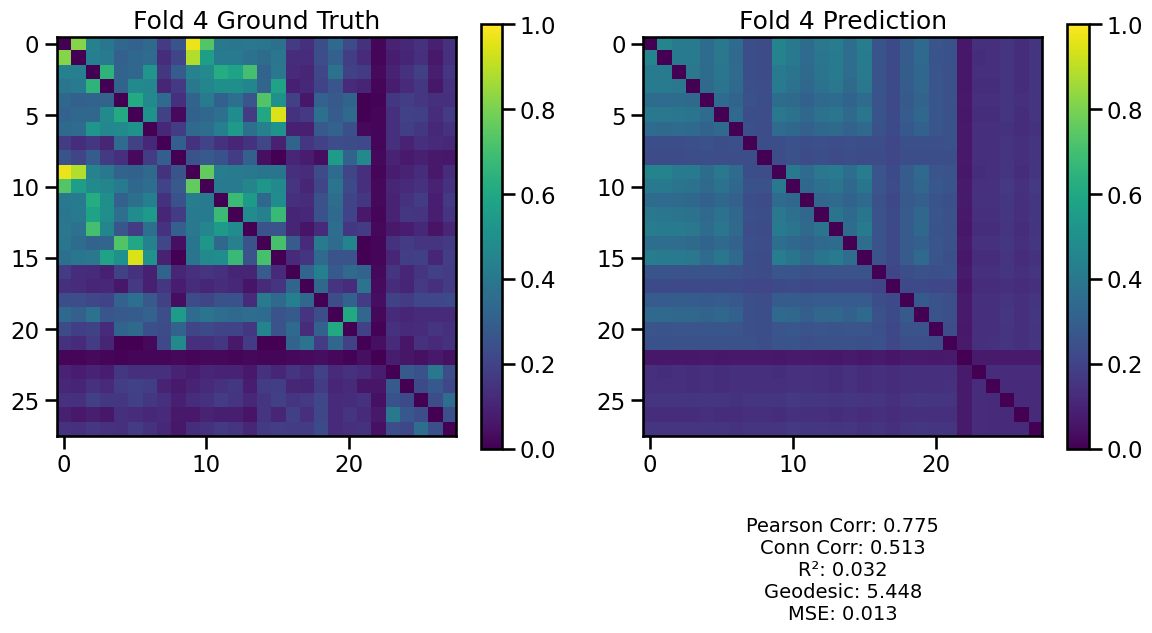

In [66]:
plot.plot_single_model_predictions_with_metrics(trans_xgb_random_nonshared_sim_results)

### Experiment Run for Structural Connectivity

In [11]:
structural_xgb_random_nonshared_sim_results = single_sim_run(cv_type='community',
                                              model_type='xgboost',
                                              feature_type='structural',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...

 Test fold num: 1
(6320, 228) (6320,) (1122, 228) (1122,)
2
3
Processing fold 0...
Processing fold 1...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   3.2s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   2.5s

Grid Search CV Results:
Best Parameters:  {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 250, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1, 'tree_meth

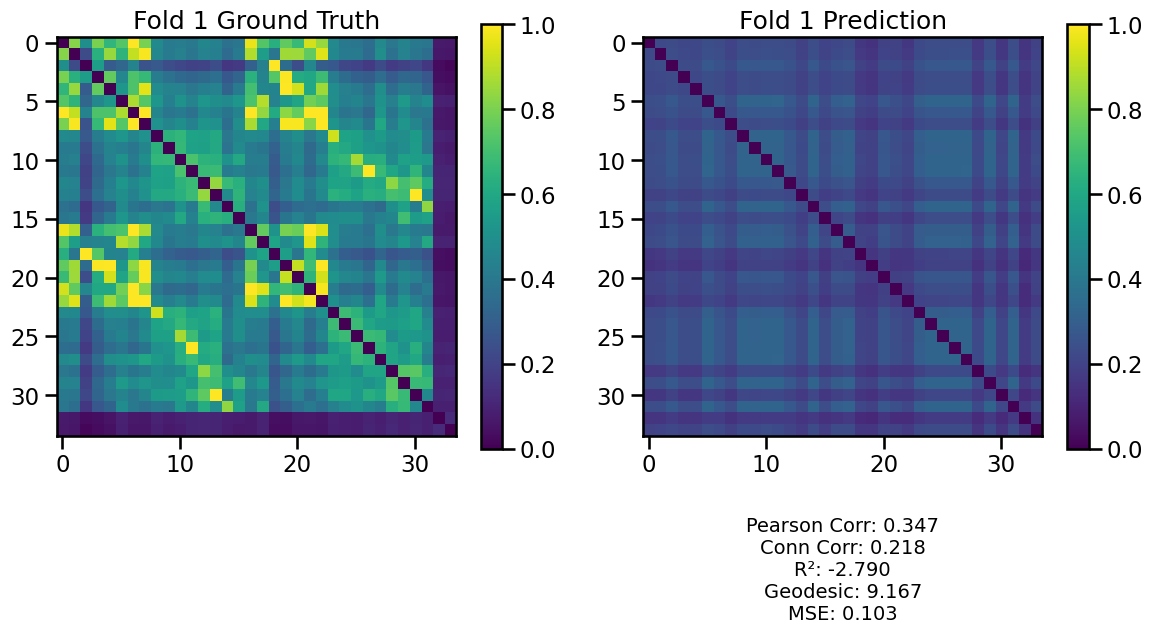

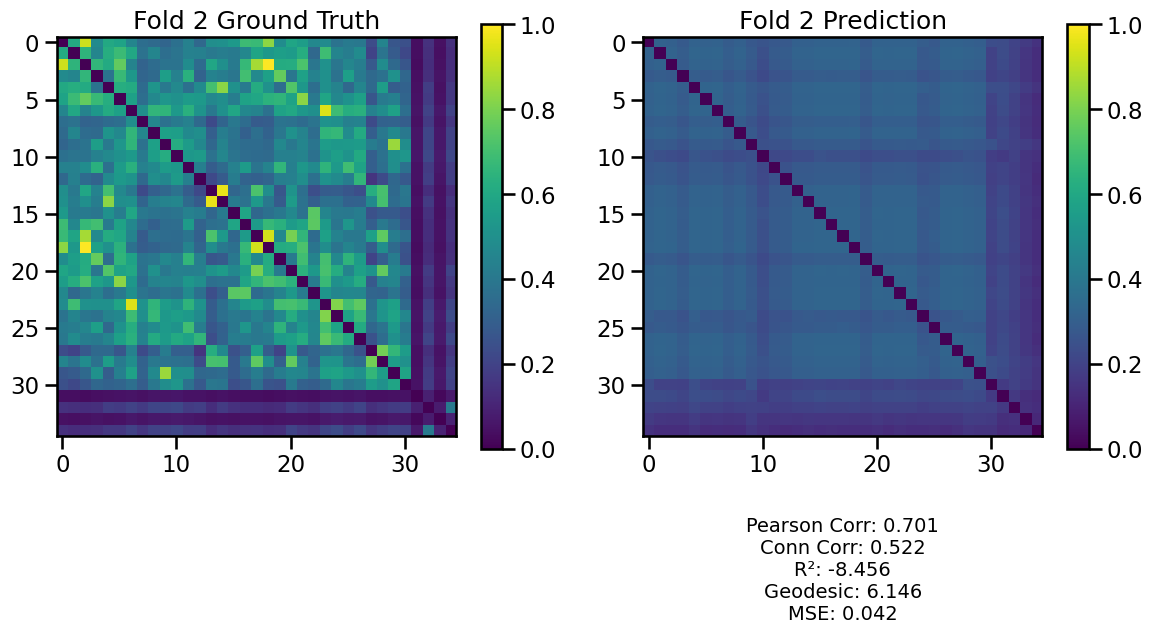

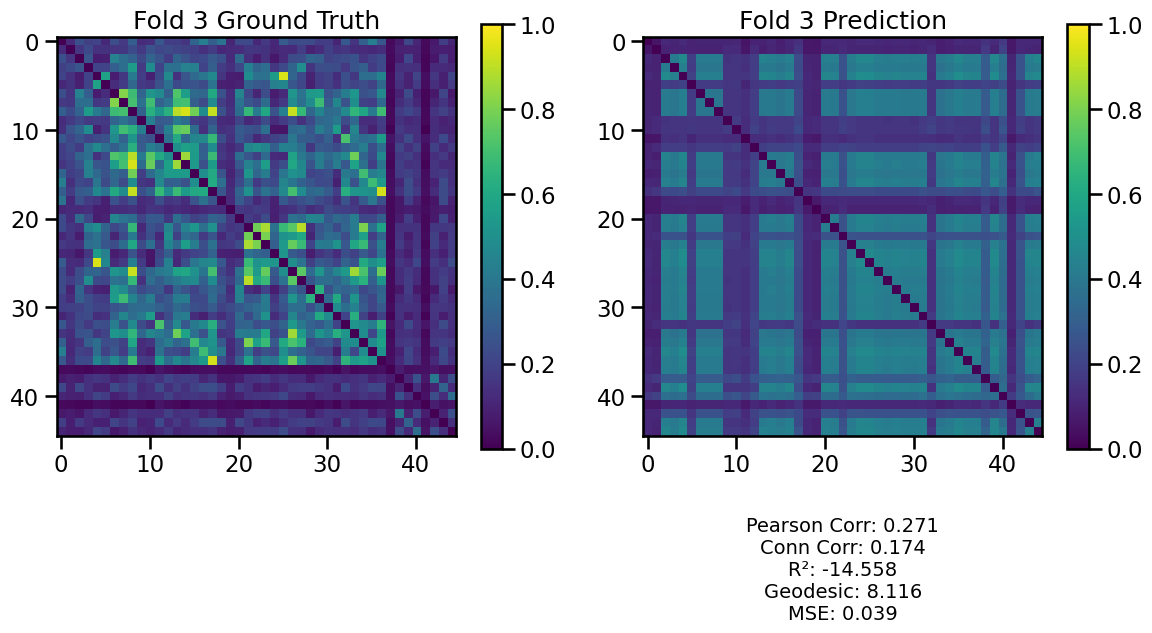

In [12]:
plot.plot_single_model_predictions_with_metrics(structural_xgb_random_nonshared_sim_results)

### Experiment Run for Transcriptome PCA

In [47]:
transPCA_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95% of the variance: 40
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 80) (7140,) (812, 80) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   5.2s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=   5.1s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total tim

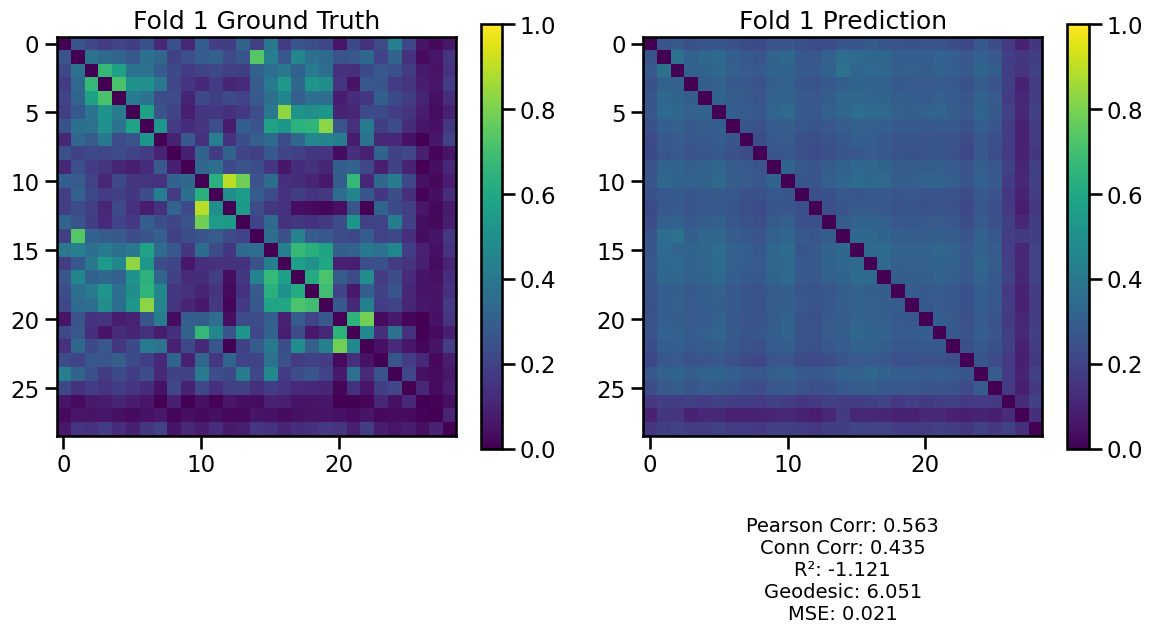

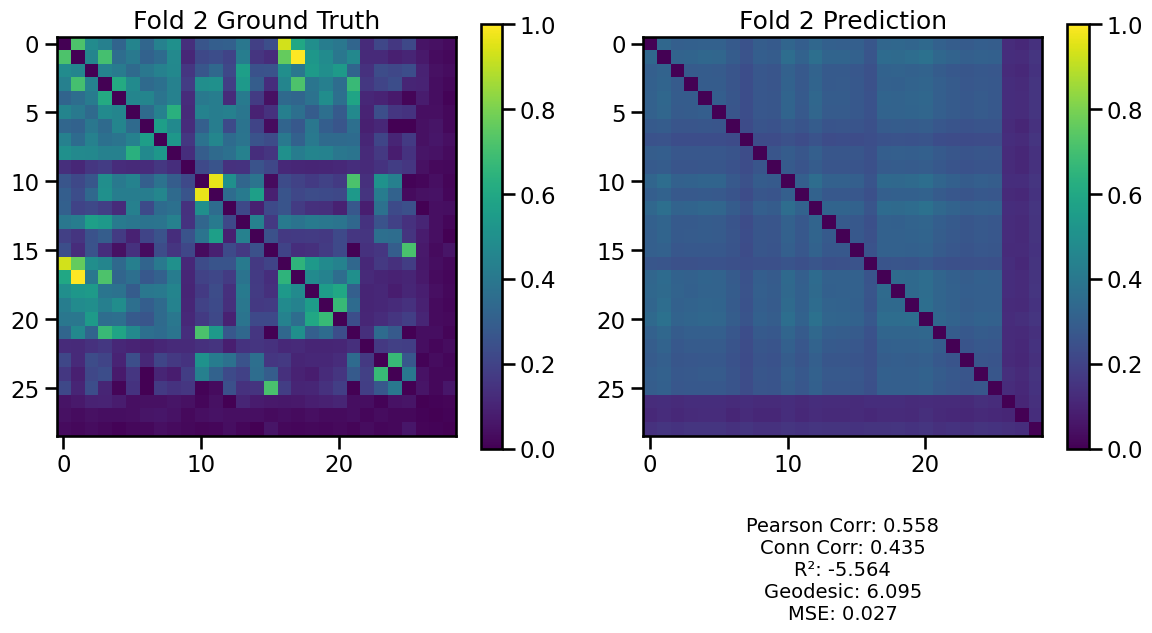

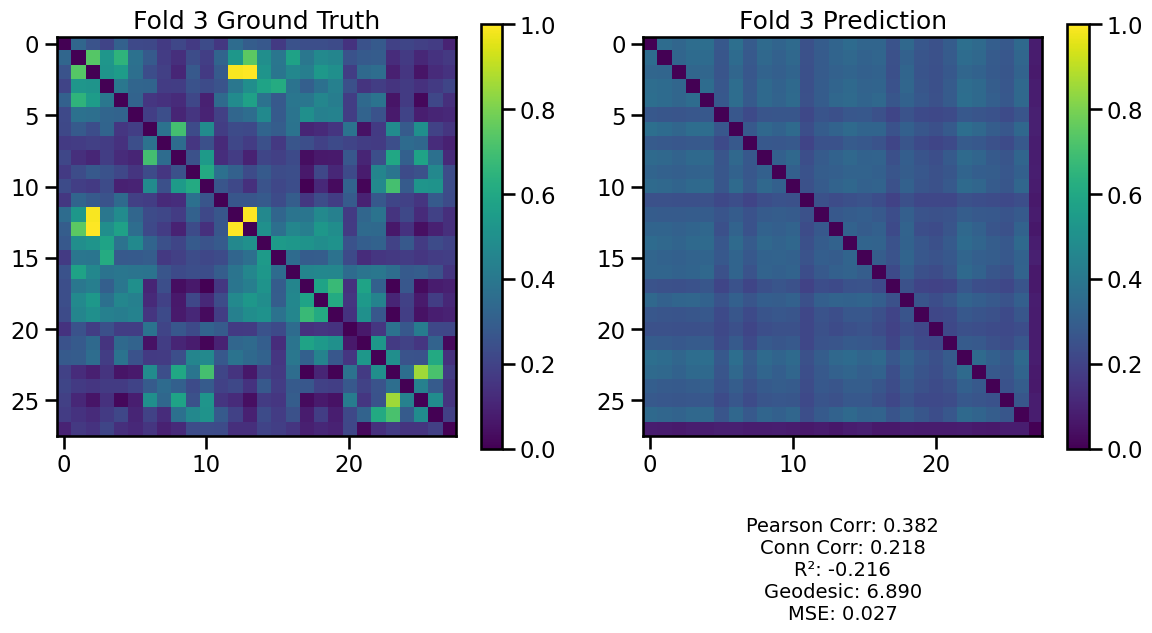

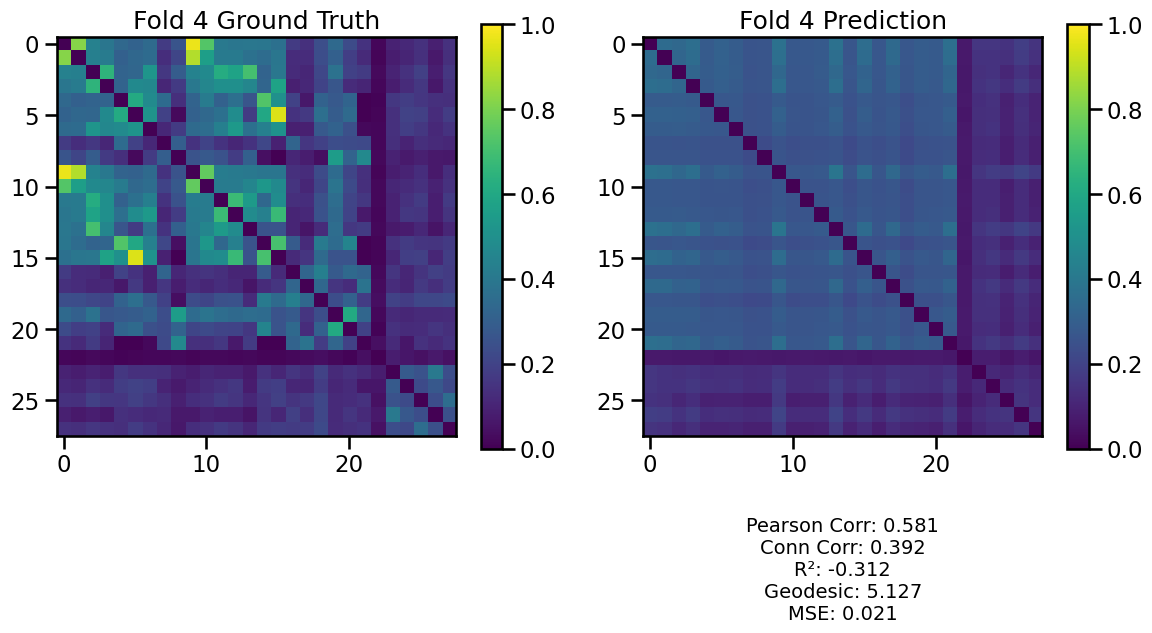

In [24]:
plot.plot_single_model_predictions_with_metrics(transPCA_xgb_random_nonshared_sim_results)

### Experiment Run for Transcriptome PCA+Kronecker

In [20]:
transPCAkron_xgb_random_nonshared_sim_results = single_sim_run(cv_type='random',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA+kron',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 1156) (7140,) (812, 1156) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.481 total time=   6.3s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.351 total time=   6.6s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0

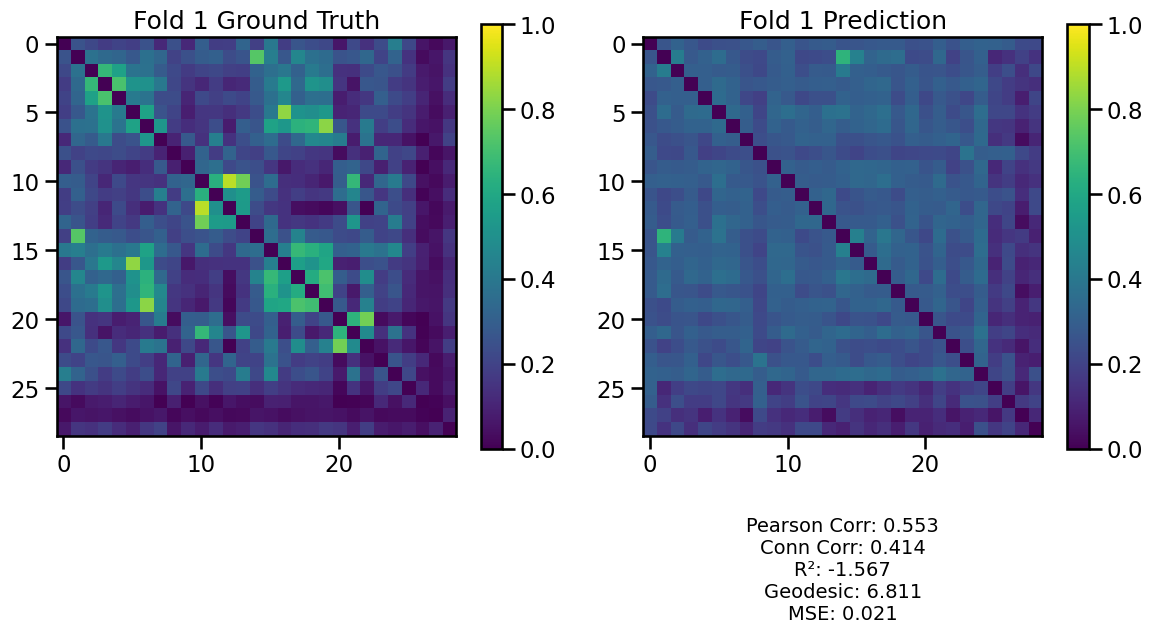

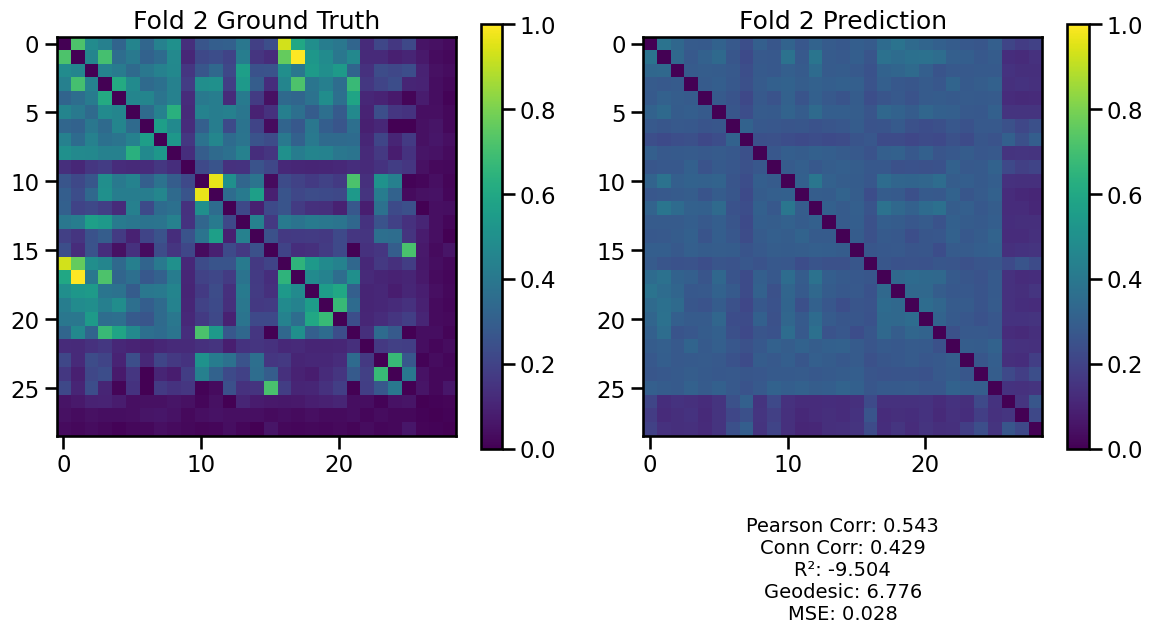

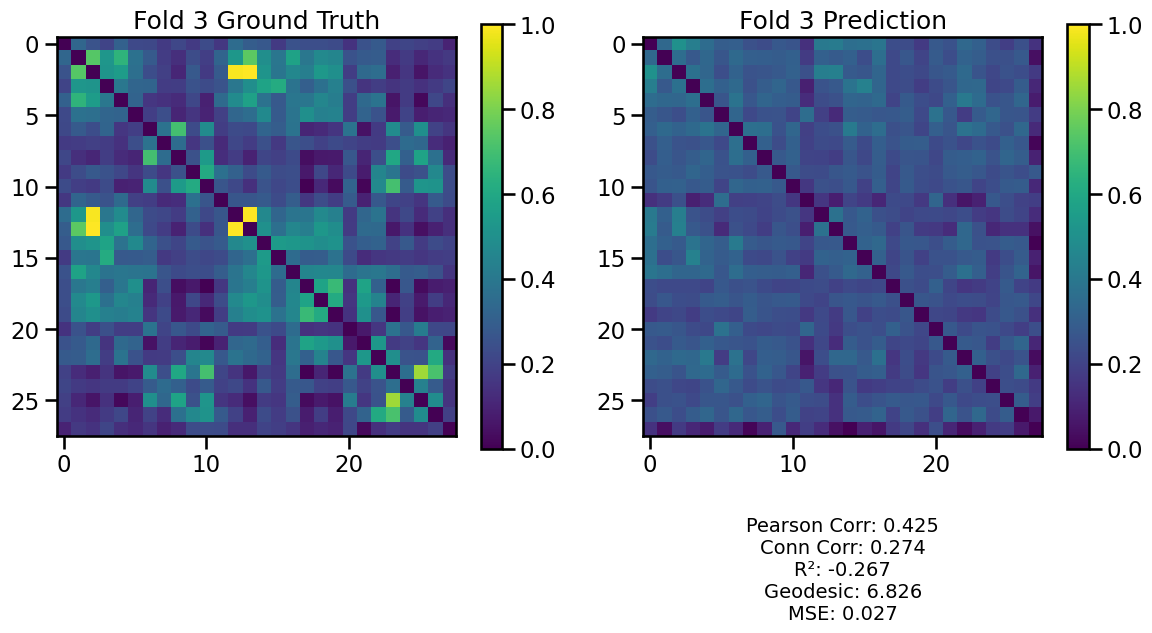

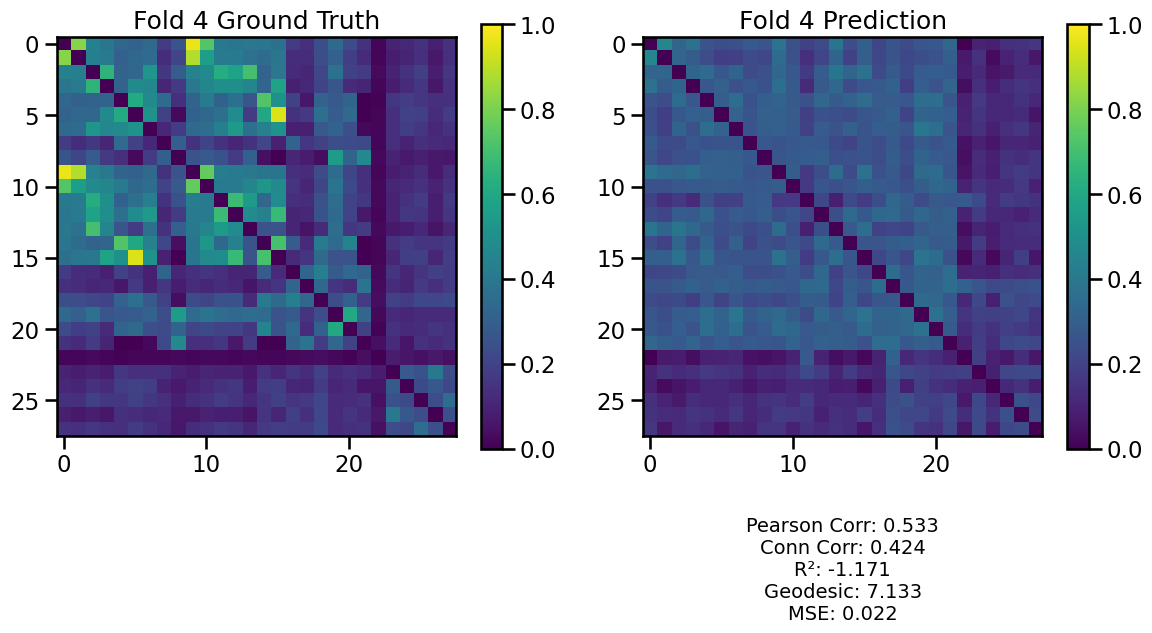

In [22]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_random_nonshared_sim_results)

In [18]:
transPCAkron_xgb_community_nonshared_sim_results = single_sim_run(cv_type='community',
                                              model_type='xgboost',
                                              feature_type='trans only',
                                              summary_measure='PCA+kron',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=False,
                                              search_method='grid'
                                              )

Number of components explaining 95.0% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...

 Test fold num: 1
(6320, 1156) (6320,) (1122, 1156) (1122,)
2
3
Processing fold 0...
Processing fold 1...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=  12.0s
[CV] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, random_state=42, reg_alpha=0, reg_lambda=0, subsample=1, tree_method=hist, verbosity=2; total time=  10.1s

Grid Search CV Results:
Best Parameters:  {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1, 'tree_

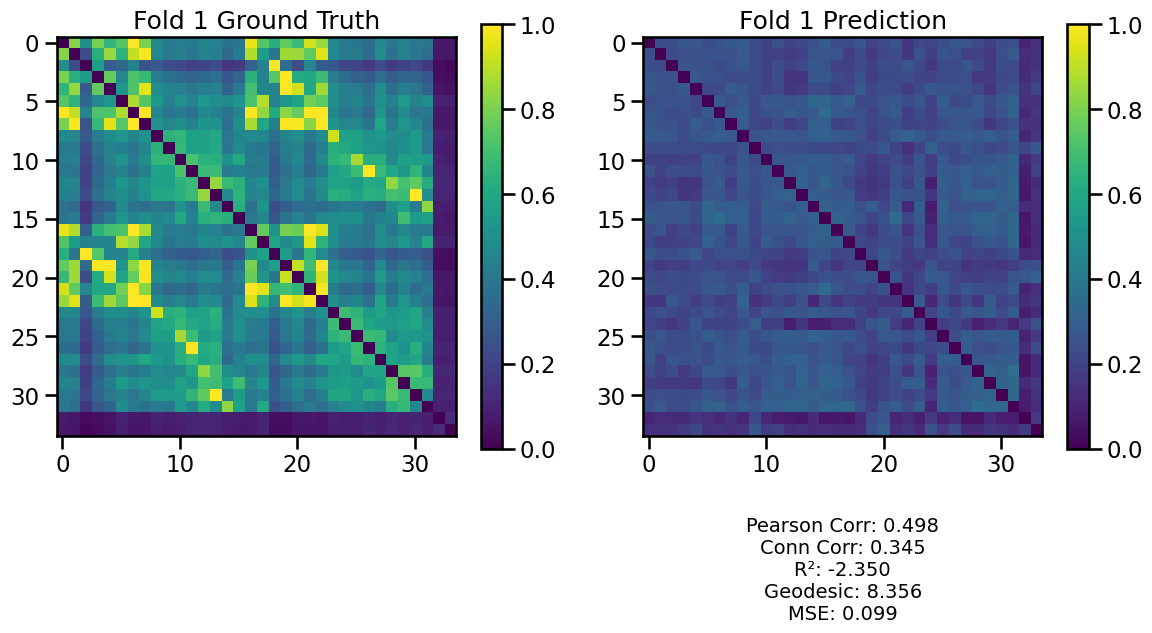

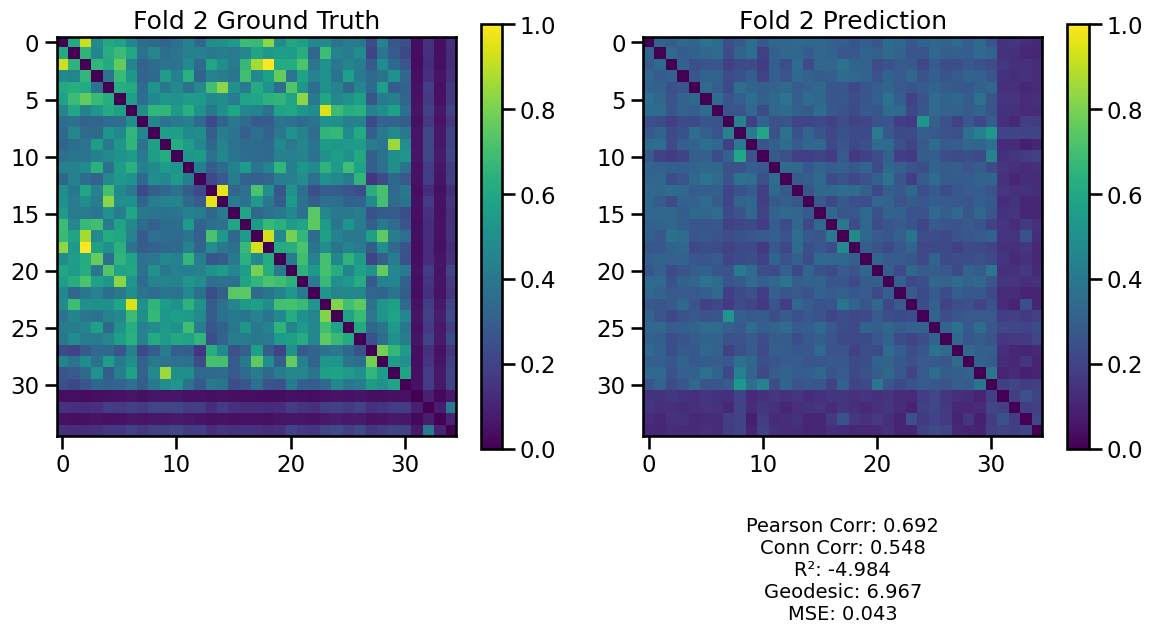

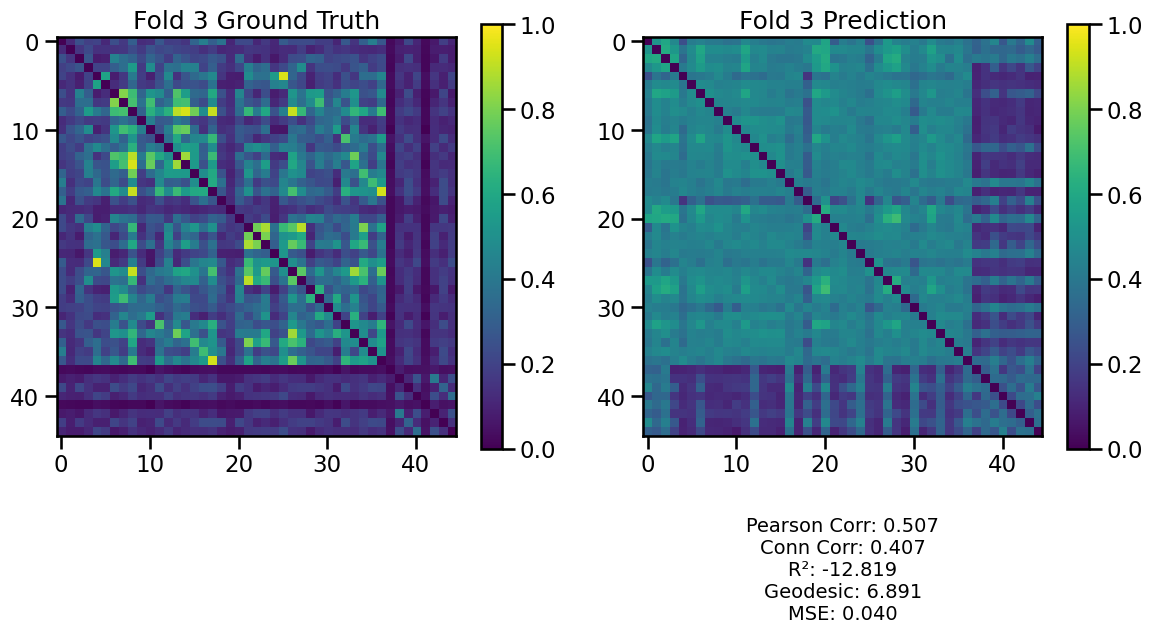

In [19]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_community_nonshared_sim_results)

### Multi feature experiment run

In [163]:
custom_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type=['transcriptomePCA', 'structural'],
                                              summary_measure=None,
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
self X shape (114, 148)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 296) (7140,) (812, 296) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
model build init 296
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
y_true shape: (812,)
y_pred shape: (812,)
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.378 total time=   1.6s
y_true shape: (756,)
y_pred shape: (756,)
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.175 total time=   0.3s
y_true sha

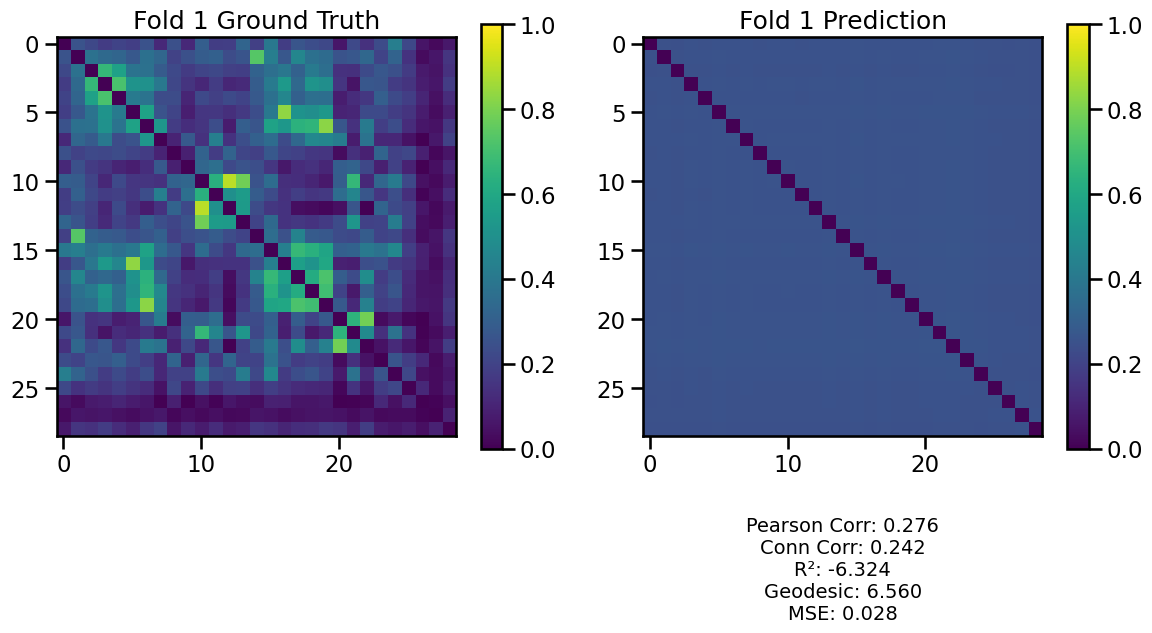

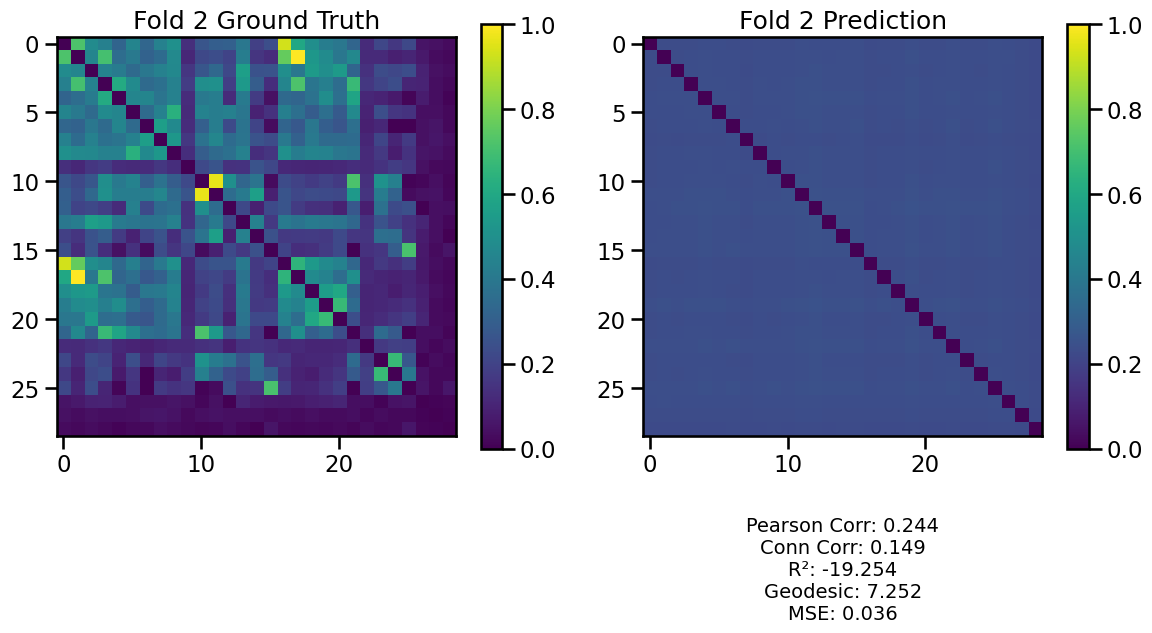

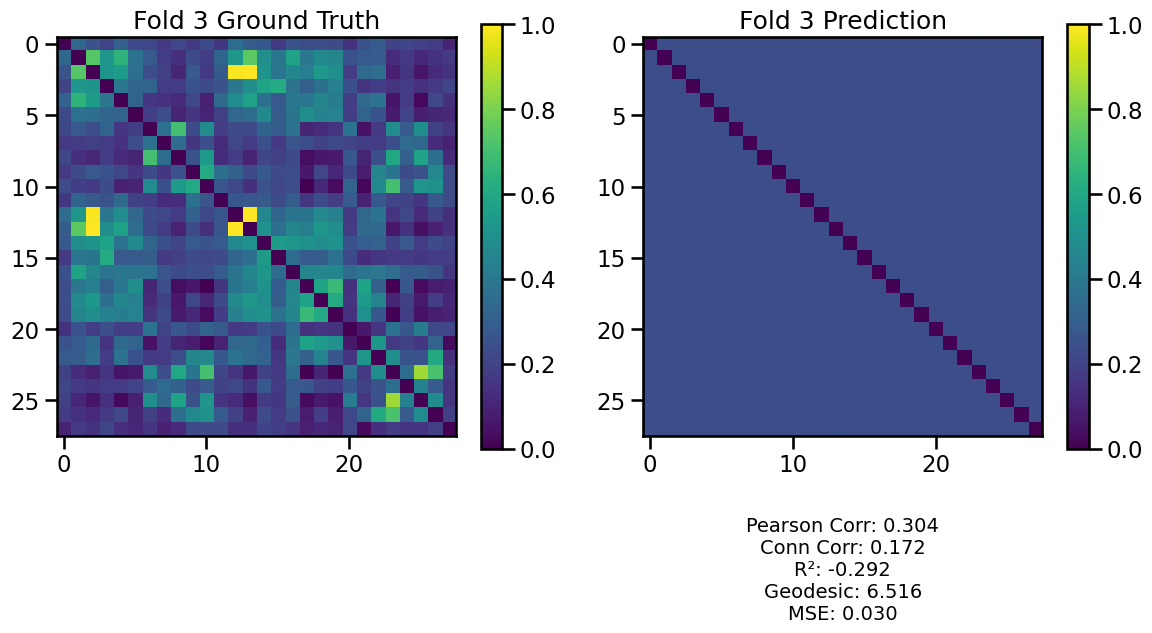

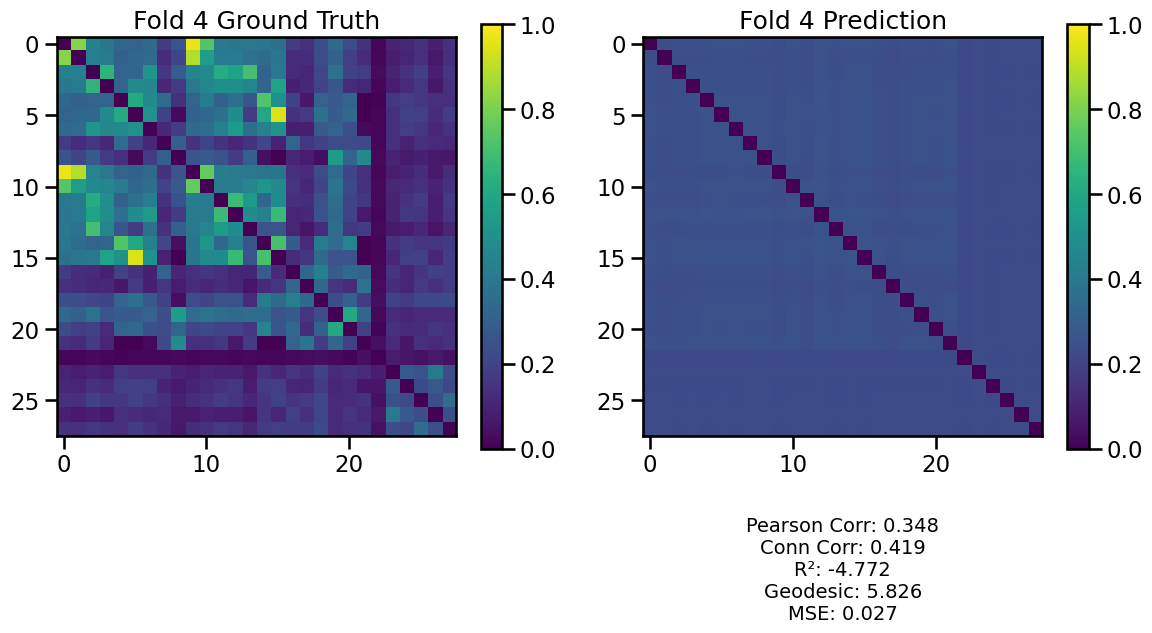

In [16]:
plot.plot_single_model_predictions_with_metrics(custom_xgb_random_nonshared_sim_results)